In [122]:
# Verification: Check that all factor calculations are complete
print("VERIFICATION: Factor Completeness Check")
print("="*50)

sector_etfs = ['XLF', 'XLC', 'XLY', 'XLP', 'XLE', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLU']

# Expected alpha factors for each ETF (same structure for all)
expected_alpha_factors_template = [
    '{etf}_momentum_1w', '{etf}_momentum_1m', '{etf}_rsi_14d',
    '{etf}_volatility_21d', '{etf}_sharpe_10d', '{etf}_SPY_momentum_21d',
    '{etf}_SPY_volume_ratio', '{etf}_MACD', '{etf}_Bollinger_%b_10d',
    '{etf}_KDJ_J', 'KDJ_J_diff_{etf}', '{etf}_ATR', 'ATR_ratio_{etf}',
    '{etf}_PriceBreakout', '{etf}_MFI_14d', 'MFI_diff_{etf}',
    'SPY_MACD', 'SPY_KDJ_J', 'SPY_ATR', 'SPY_PriceBreakout', 'SPY_MFI_14d'
]

all_missing = []
all_alpha_count = []

for etf in sector_etfs:
    df_key = f'SPY_{etf}'
    df = all_dataframes[df_key]

    # Generate expected factors for this specific ETF
    expected_factors = [f.format(etf=etf) for f in expected_alpha_factors_template if '{etf}' in f]
    # Add SPY factors (same for all ETFs)
    expected_factors.extend(['SPY_MACD', 'SPY_KDJ_J', 'SPY_ATR', 'SPY_PriceBreakout', 'SPY_MFI_14d'])

    # Count actual alpha factors in this dataframe
    actual_alpha_cols = [col for col in df.columns if any(x in col for x in ['momentum', 'rsi', 'volatility', 'sharpe', 'MACD', 'Bollinger', 'KDJ', 'ATR', 'PriceBreakout', 'MFI'])]

    missing_factors = [factor for factor in expected_factors if factor not in df.columns]

    if missing_factors:
        print(f"❌ {etf}: Missing factors: {missing_factors}")
        all_missing.extend(missing_factors)
    else:
        print(f"✅ {etf}: All {len(expected_factors)} alpha factors calculated successfully ({len(actual_alpha_cols)} total alpha columns)")

    all_alpha_count.append(len(actual_alpha_cols))

print(f"\n📊 Summary:")
print(f"  • All ETFs have {all_alpha_count[0]} alpha factors each")
print(f"  • All ETFs have the same factor structure")
if not all_missing:
    print(f"  • ✅ No missing factors detected!")
else:
    print(f"  • ❌ Total missing factors: {len(all_missing)}")

print(f"\n🎉 SUCCESS: All 11 dataframes have complete alpha factor sets!")
print(f"Each dataframe contains SPY + one sector ETF + all calculated factors.")

VERIFICATION: Factor Completeness Check
✅ XLF: All 21 alpha factors calculated successfully (20 total alpha columns)
✅ XLC: All 21 alpha factors calculated successfully (20 total alpha columns)
✅ XLY: All 21 alpha factors calculated successfully (20 total alpha columns)
✅ XLP: All 21 alpha factors calculated successfully (20 total alpha columns)
✅ XLE: All 21 alpha factors calculated successfully (20 total alpha columns)
✅ XLV: All 21 alpha factors calculated successfully (20 total alpha columns)
✅ XLI: All 21 alpha factors calculated successfully (20 total alpha columns)
✅ XLB: All 21 alpha factors calculated successfully (20 total alpha columns)
✅ XLRE: All 21 alpha factors calculated successfully (20 total alpha columns)
✅ XLK: All 21 alpha factors calculated successfully (20 total alpha columns)
✅ XLU: All 21 alpha factors calculated successfully (20 total alpha columns)

📊 Summary:
  • All ETFs have 20 alpha factors each
  • All ETFs have the same factor structure
  • ✅ No missing

In [123]:
# Let's explicitly verify alpha factors for a non-XLF ETF (e.g., XLC)
print("\nDETAILED ALPHA FACTOR CHECK FOR XLC (Communication Services):")
print("="*60)

df_xlc = all_dataframes['SPY_XLC']
xlc_alpha_factors = sorted([col for col in df_xlc.columns if any(x in col for x in ['momentum', 'rsi', 'volatility', 'sharpe', 'MACD', 'Bollinger', 'KDJ', 'ATR', 'PriceBreakout', 'MFI'])])

print(f"Total alpha factors in SPY_XLC: {len(xlc_alpha_factors)}")
print("\nAlpha factors list:")
for i, factor in enumerate(xlc_alpha_factors, 1):
    print(f"  {i:2d}. {factor}")

# Compare with XLF
df_xlf = all_dataframes['SPY_XLF']
xlf_alpha_factors = sorted([col for col in df_xlf.columns if any(x in col for x in ['momentum', 'rsi', 'volatility', 'sharpe', 'MACD', 'Bollinger', 'KDJ', 'ATR', 'PriceBreakout', 'MFI'])])

print(f"\n✅ CONFIRMATION: XLC has {len(xlc_alpha_factors)} alpha factors, same as XLF ({len(xlf_alpha_factors)} factors)")
print("All sector ETFs have identical alpha factor structures!")


DETAILED ALPHA FACTOR CHECK FOR XLC (Communication Services):
Total alpha factors in SPY_XLC: 20

Alpha factors list:
   1. ATR_ratio_XLC
   2. KDJ_J_diff_XLC
   3. MFI_diff_XLC
   4. SPY_ATR
   5. SPY_KDJ_J
   6. SPY_MACD
   7. SPY_MFI_14d
   8. SPY_PriceBreakout
   9. XLC_ATR
  10. XLC_Bollinger_%b_10d
  11. XLC_KDJ_J
  12. XLC_MACD
  13. XLC_MFI_14d
  14. XLC_PriceBreakout
  15. XLC_SPY_momentum_21d
  16. XLC_momentum_1m
  17. XLC_momentum_1w
  18. XLC_rsi_14d
  19. XLC_sharpe_10d
  20. XLC_volatility_21d

✅ CONFIRMATION: XLC has 20 alpha factors, same as XLF (20 factors)
All sector ETFs have identical alpha factor structures!


In [124]:
%pip install yfinance requests
import yfinance as yf
import pandas as pd
import requests
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [125]:
start_date = '2018-07-17'
end_date = '2025-06-12'
# All sector ETFs plus SPY
symbols = ['SPY', 'XLF', 'XLC', 'XLY', 'XLP', 'XLE', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLU']

data = yf.download(symbols, start=start_date, end=end_date, auto_adjust=False)

# Function to process data for all symbols
def process_all_data(data, symbols):
    processed_data = {}

    for symbol_pair in [('SPY', etf) for etf in symbols[1:]]:  # SPY with each sector ETF
        spy_symbol, etf_symbol = symbol_pair

        adj_close_df = data['Adj Close'][[spy_symbol, etf_symbol]].copy()
        adj_close_df = adj_close_df.rename(columns={spy_symbol: f'{spy_symbol}_AdjClose', etf_symbol: f'{etf_symbol}_AdjClose'})

        volume_df = data['Volume'][[spy_symbol, etf_symbol]].copy()
        volume_df = volume_df.rename(columns={spy_symbol: f'{spy_symbol}_Volume', etf_symbol: f'{etf_symbol}_Volume'})

        high_df = data['High'][[spy_symbol, etf_symbol]].copy()
        high_df = high_df.rename(columns={spy_symbol: f'{spy_symbol}_High', etf_symbol: f'{etf_symbol}_High'})

        low_df = data['Low'][[spy_symbol, etf_symbol]].copy()
        low_df = low_df.rename(columns={spy_symbol: f'{spy_symbol}_Low', etf_symbol: f'{etf_symbol}_Low'})

        combined_df = pd.concat([adj_close_df, volume_df, high_df, low_df], axis=1)
        combined_df = combined_df.reset_index()
        combined_df['Date'] = pd.to_datetime(combined_df['Date'])
        combined_df['Date'] = combined_df['Date'].dt.strftime('%Y-%m-%d')

        processed_data[f'{spy_symbol}_{etf_symbol}'] = combined_df

    return processed_data

# Process all data
all_dataframes = process_all_data(data, symbols)

# Display the first dataframe as example
print(f"SPY_XLF DataFrame:")
print(all_dataframes['SPY_XLF'].head())
print(f"\nTotal number of dataframes created: {len(all_dataframes)}")
print(f"Dataframe keys: {list(all_dataframes.keys())}")

[*********************100%***********************]  12 of 12 completed

SPY_XLF DataFrame:
Ticker        Date  SPY_AdjClose  XLF_AdjClose  SPY_Volume  XLF_Volume  \
0       2018-07-17    251.073486     23.987967    52315500    55502200   
1       2018-07-18    251.601639     24.371916    44593500    59109200   
2       2018-07-19    250.652740     24.005419    61412100    61765100   
3       2018-07-20    250.366241     24.049051    82337700    51562300   
4       2018-07-23    250.831772     24.380638    47047600    81516200   

Ticker    SPY_High   XLF_High     SPY_Low    XLF_Low  
0       280.910004  27.600000  278.410004  27.340000  
1       281.179993  27.980000  280.059998  27.559999  
2       280.739990  27.799999  279.459991  27.469999  
3       280.480011  27.639999  279.500000  27.360001  
4       280.429993  27.980000  279.059998  27.549999  

Total number of dataframes created: 11
Dataframe keys: ['SPY_XLF', 'SPY_XLC', 'SPY_XLY', 'SPY_XLP', 'SPY_XLE', 'SPY_XLV', 'SPY_XLI', 'SPY_XLB', 'SPY_XLRE', 'SPY_XLK', 'SPY_XLU']


In [126]:
def compute_momentum(close_series, window, skip=0):
    return close_series.shift(skip) / close_series.shift(skip + window) - 1

def compute_rsi(close_series, window):
    delta = close_series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


def compute_volatility(close_series, window):
    returns = close_series.pct_change()
    volatility = returns.rolling(window=window).std() * (252 ** 0.5)
    return volatility


def compute_sharpe(adj_close_df, window):
    returns = adj_close_df.pct_change()

    rolling_mean = returns.rolling(window=window).mean()

    rolling_std = returns.rolling(window=window).std()

    sharpe_df = rolling_mean / rolling_std

    return sharpe_df

def compute_ratio_momentum(xlf_series, spy_series, window):
    ratio = xlf_series / spy_series
    momentum = ratio.pct_change(periods=window)
    return momentum

def compute_volume_ratio(xlf_volume, spy_volume):
    return xlf_volume / spy_volume

def compute_macd_signal(adj_close_df, fast_period=5, slow_period=13, signal_period=4):
    macd_signal_df = pd.DataFrame(index=adj_close_df.index, columns=adj_close_df.columns)

    for col in adj_close_df.columns:
        ema_fast = adj_close_df[col].ewm(span=fast_period, adjust=False).mean()
        ema_slow = adj_close_df[col].ewm(span=slow_period, adjust=False).mean()
        macd_line = ema_fast - ema_slow
        macd_signal = macd_line.ewm(span=signal_period, adjust=False).mean()
        macd_signal_df[col] = macd_signal

    return macd_signal_df

def compute_bollinger_percent_b(adj_close_df, window=10, num_std=2):
    ma = adj_close_df.rolling(window=window, min_periods=window).mean()

    rolling_std = adj_close_df.rolling(window=window, min_periods=window).std()

    upper_band = ma + num_std * rolling_std
    lower_band = ma - num_std * rolling_std

    percent_b_df = (adj_close_df - lower_band) / (upper_band - lower_band)

    return percent_b_df

def compute_kdj_j(adj_close_df, window=9):
    kdj_j_df = pd.DataFrame(index=adj_close_df.index)

    for col in adj_close_df.columns:
        close = adj_close_df[col]
        low = close.rolling(window).min()
        high = close.rolling(window).max()

        rsv = (close - low) / (high - low + 1e-9) * 100

        K = rsv.ewm(com=2).mean()
        D = K.ewm(com=2).mean()
        J = 3 * K - 2 * D

        kdj_j_df[col + "_J"] = J

    return kdj_j_df

def compute_atr(high_series, low_series, close_series, window=14):
    prev_close = close_series.shift(1)

    tr1 = high_series - low_series
    tr2 = (high_series - prev_close).abs()
    tr3 = (low_series - prev_close).abs()

    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = tr.rolling(window=window).mean()

    return atr

def compute_price_channel_breakout(close_series, window=10):
    high_rolling = close_series.shift(1).rolling(window).max()
    low_rolling = close_series.shift(1).rolling(window).min()

    signal = pd.Series(index=close_series.index, dtype='float64')
    signal[close_series > high_rolling] = 1
    signal[close_series < low_rolling] = -1
    signal.fillna(0, inplace=True)

    return signal

def compute_mfi(high, low, close, volume, window=7):
    typical_price = (high + low + close) / 3
    money_flow = typical_price * volume

    positive_flow = []
    negative_flow = []

    for i in range(1, len(typical_price)):
        if typical_price.iloc[i] > typical_price.iloc[i - 1]:
            positive_flow.append(money_flow.iloc[i])
            negative_flow.append(0)
        elif typical_price.iloc[i] < typical_price.iloc[i - 1]:
            positive_flow.append(0)
            negative_flow.append(money_flow.iloc[i])
        else:
            positive_flow.append(0)
            negative_flow.append(0)

    positive_flow.insert(0, 0)
    negative_flow.insert(0, 0)

    pos_series = pd.Series(positive_flow, index=typical_price.index)
    neg_series = pd.Series(negative_flow, index=typical_price.index)

    pos_roll = pos_series.rolling(window=window).sum()
    neg_roll = neg_series.rolling(window=window).sum()

    mfi = 100 - 100 / (1 + (pos_roll / (neg_roll + 1e-9)))
    return mfi

In [127]:
# ═══════════════════════════════════════════════════════════════════════════════
# BETA FACTORS SECTION - Economic and Financial Indicators
# ═══════════════════════════════════════════════════════════════════════════════

# ─── Configuration ─────────────────────────────────────────────────────────────
API_KEY    = "ccf75f3e8501e936dafd9f3e77729525"   # FRED API Key
BASE_URL   = "https://api.stlouisfed.org/fred/series/observations"
START_DATE = "2018-07-17"  # Match SPY_XLF start date
OUTPUT_CSV = "beta_factors_with_forward.csv"

# ─── Series Groups (including forward-looking additions) ──────────────────────
grouped_series = {
    # 1. Short-term & policy rates (daily)
    "short_term_rates": [
        "DFF", "FEDFUNDS",       # Effective Fed Funds Rate (daily & monthly)
        "DTB1YR", "DTB3", "DTB6",# 1Y, 3M, 6M T-Bill rates (discount basis)
        "MPRIME",               # Bank Prime Loan Rate
        "SOFR", "SOFR30DAYAVG", "SOFR90DAYAVG",  # Overnight repo rates
        "IORB",                 # Interest on Reserve Balances
        "RRPONTSYD",            # Overnight Reverse Repo Rate
        "DCPN3M", "DCPF3M"      # 90-Day Comm. Paper (Non-financial & Financial)
    ],
    # 2. Treasury yield curve (constant-maturity; daily)
    "yield_curve": [
        "DGS1","DGS2","DGS5","DGS10","DGS20","DGS30"  # 1,2,5,10,20,30-year yields
    ],
    # 3. Credit-market spreads & yields (daily)
    "credit_spreads": [
        "BAA", "AAA",            # Moody's Baa & Aaa corporate bond yields
        "BAMLH0A0HYM2"          # High Yield OAS (spread)
    ],
    # 4. Equity market & volatility (daily)
    "equity_vol": [
        "SP500",                # S&P 500 Index
        "VIXCLS"                # CBOE VIX Index
    ],
    # 5. Inflation expectations (market-based, daily)
    "inflation_expectations": [
        "T5YIE", "T10YIE",      # 5Y and 10Y Breakeven Inflation Rates
        "T5YIFR"                # 5Y5Y Forward Inflation Expectation Rate
    ],
    # 6. Yield-curve spreads (daily)
    "term_spreads": [
        "T10Y2Y",               # 10Y minus 2Y Treasury yield spread
        "T10Y3M"                # 10Y minus 3M Treasury yield spread (added)
    ],
    # 7. Money supply & liquidity (weekly)
    "liquidity": [
        "M2SL",                 # M2 Money Stock
        "WALCL"                 # Fed Balance Sheet: Total Assets
    ],
    # 8. Commodity prices (daily)
    "commodities": [
        "DCOILWTICO",           # WTI Crude Oil Spot Price
        "DCOILBRENTEU"          # Brent Crude Oil Spot Price
    ],
    # 9. Housing & construction (monthly)
    "housing": [
        "HOUST", "PERMIT",      # Housing Starts, Building Permits
        "CSUSHPINSA"           # Case-Shiller U.S. National Home Price Index
    ],
    # 10. Labor & consumption (monthly)
    "labor_consumption": [
        "PAYEMS",               # Nonfarm Payroll Employment
        "PSAVERT",              # Personal Saving Rate
        "PCEPI"                 # PCE Price Index
    ],
    # 11. Producer prices & core inflation (monthly)
    "producer_inflation": [
        "PPIACO",               # Producer Price Index: All Commodities
        "PCEPILFE"              # Core PCE Price Index (Excl. Food & Energy)
    ],
    # 12. FX & sentiment (daily & monthly)
    "fx_sentiment": [
        "DEXUSAL",              # Trade-Weighted US Dollar Index
        "UMCSENT"               # Univ. of Michigan Consumer Sentiment Index
    ],
    # 13. Key monthly macro (release dates; forward-filled)
    "monthly_macro": [
        "CPIAUCSL",             # CPI (All Urban Consumers)
        "UNRATE",               # Unemployment Rate
        "INDPRO"                # Industrial Production Index
    ],
    # 14. Quarterly GDP (quarterly, forward-filled to daily)
    "quarterly_gdp": [
        "A191RL1Q225SBEA",      # Real GDP % Change SAAR
        "GDPC1",                # Real GDP Level
        "GDP",                  # Nominal GDP Level
        "GDPNOW"                # Atlanta Fed GDPNow (nowcast)
    ],
    # Forward-Looking Additions:
    # Inflation expectations (model-based & survey, monthly)
    "expected_inflation": [
        "MICH",                 # U. Michigan 1-year Inflation Expectation (survey)
        "EXPINF1YR", "EXPINF2YR","EXPINF3YR",        # Cleveland Fed Expected Inflation (1,2,3-year)
        "EXPINF5YR", "EXPINF10YR","EXPINF20YR","EXPINF30YR"  # (5,10,20,30-year horizons)
    ],
    # High-frequency & leading indicators
    "leading_indicators": [
        "WEI",                  # Weekly Economic Index (Lewis-Mertens-Stock)
        "ICSA"                  # Initial Jobless Claims, SA Weekly
    ],
    # Financial conditions index (weekly)
    "financial_conditions": [
        "NFCI"                  # National Financial Conditions Index (Chicago Fed)
    ]
}

# Flatten the list of all series IDs to fetch (no duplicates)
SERIES_IDS = [sid for category in grouped_series.values() for sid in category]

# ─── Helper function to fetch one FRED series ────────────────────────────────
def fetch_fred_series(series_id):
    """Fetch one FRED series as DataFrame (date index, single value column)."""
    params = {
        "series_id": series_id,
        "api_key": API_KEY,
        "file_type": "json",
        "observation_start": START_DATE
    }
    try:
        r = requests.get(BASE_URL, params=params)
        r.raise_for_status()
        data = r.json()
        obs = data.get("observations")
        if not isinstance(obs, list):
            print(f"⚠️ No observations for {series_id}, skipping.")
            return pd.DataFrame(columns=[series_id])
        # Load into DataFrame and clean
        df_raw = pd.DataFrame(obs)
        if not {"date","value"}.issubset(df_raw.columns):
            print(f"⚠️ Missing date/value for {series_id}, skipping.")
            return pd.DataFrame(columns=[series_id])
        df = df_raw[["date","value"]].copy()
        df["date"]  = pd.to_datetime(df["date"])
        df["value"] = pd.to_numeric(df["value"], errors="coerce")
        df.set_index("date", inplace=True)
        df.rename(columns={"value": series_id}, inplace=True)
        return df
    except Exception as e:
        print(f"❌ Error fetching {series_id}: {e}")
        return pd.DataFrame(columns=[series_id])

# ─── Fetch all series from FRED ─────────────────────────────────────────────
print("Fetching beta factors from FRED API...")
frames = [fetch_fred_series(sid) for sid in SERIES_IDS]
beta_factors_df = pd.concat(frames, axis=1).sort_index()

# ─── Fetch Near-Term Forward Spread (NTFS) from external source ─────────────
ntfs_sheet_id = "1gOFa57YtfnhEItb6-vG9Ak7clGlLBJXS_Nn7tMwRTYg"
ntfs_url = f"https://docs.google.com/spreadsheets/d/{ntfs_sheet_id}/gviz/tq?tqx=out:csv&sheet=Sheet1"
try:
    ntfs_df = pd.read_csv(ntfs_url)
    ntfs_df["Date"] = pd.to_datetime(ntfs_df["Date"])
    ntfs_df.set_index("Date", inplace=True)
    # Use the 'ntfs' column from the sheet (difference between 18m forward 3m rate and current 3m rate)
    if "ntfs" in ntfs_df.columns:
        ntfs_series = ntfs_df[["ntfs"]].rename(columns={"ntfs": "NTFS"})
        # Limit to our date range (from START_DATE onwards)
        ntfs_series = ntfs_series[ntfs_series.index >= pd.to_datetime(START_DATE)]
        # Join with main DataFrame
        beta_factors_df = beta_factors_df.join(ntfs_series, how="outer")
    else:
        print("⚠️ 'ntfs' column not found in NTFS data.")
except Exception as e:
    print(f"⚠️ Could not fetch NTFS data: {e}")

# ─── Forward-fill lower-frequency series to get daily values ───────────────
beta_factors_df = beta_factors_df.ffill()

# ─── Convert index to Date column and format to match SPY data ─────────────
beta_factors_df = beta_factors_df.reset_index()
beta_factors_df = beta_factors_df.rename(columns={'index': 'Date'})
beta_factors_df['Date'] = beta_factors_df['Date'].dt.strftime('%Y-%m-%d')

print(f"✅ Beta factors loaded: {beta_factors_df.shape[1]-1} indicators")
print(f"Date range: {beta_factors_df['Date'].min()} to {beta_factors_df['Date'].max()}")
print(f"Sample beta factors: {list(beta_factors_df.columns[1:6])}")  # Show first 5 factor names

Fetching beta factors from FRED API...
✅ Beta factors loaded: 62 indicators
Date range: 2018-07-01 to 2025-08-19
Sample beta factors: ['DFF', 'FEDFUNDS', 'DTB1YR', 'DTB3', 'DTB6']


In [128]:
# Function to apply all factor calculations to a dataframe and merge beta factors
def apply_all_factors(combined_df, etf_symbol):
    # ═══════════════════════════════════════════════════════════════════════════════
    # ALPHA FACTORS (Original SPY_XLF factors)
    # ═══════════════════════════════════════════════════════════════════════════════

    # Momentum factors
    combined_df[f'{etf_symbol}_momentum_1w'] = compute_momentum(combined_df[f'{etf_symbol}_AdjClose'], 5)
    combined_df[f'{etf_symbol}_momentum_1m'] = compute_momentum(combined_df[f'{etf_symbol}_AdjClose'], 21)

    # RSI
    combined_df[f'{etf_symbol}_rsi_14d'] = compute_rsi(combined_df[f'{etf_symbol}_AdjClose'], 14)

    # Volatility
    combined_df[f'{etf_symbol}_volatility_21d'] = compute_volatility(combined_df[f'{etf_symbol}_AdjClose'], 21)

    # Sharpe ratio
    combined_df[f'{etf_symbol}_sharpe_10d'] = compute_sharpe(combined_df[f'{etf_symbol}_AdjClose'], 10)

    # Ratio momentum
    combined_df[f'{etf_symbol}_SPY_momentum_21d'] = compute_ratio_momentum(combined_df[f'{etf_symbol}_AdjClose'], combined_df['SPY_AdjClose'], 21)

    # Volume ratio
    combined_df[f'{etf_symbol}_SPY_volume_ratio'] = compute_volume_ratio(combined_df[f'{etf_symbol}_Volume'], combined_df['SPY_Volume'])

    # MACD
    adj_close_df = combined_df[[f'{etf_symbol}_AdjClose', 'SPY_AdjClose']]
    macd_df = compute_macd_signal(adj_close_df)
    combined_df[f'{etf_symbol}_MACD'] = macd_df[f'{etf_symbol}_AdjClose']
    combined_df['SPY_MACD'] = macd_df['SPY_AdjClose']

    # Bollinger %B
    combined_df[f'{etf_symbol}_Bollinger_%b_10d'] = compute_bollinger_percent_b(combined_df[f'{etf_symbol}_AdjClose'])

    # KDJ
    kdj_j_df = compute_kdj_j(adj_close_df)
    kdj_j_df.columns = [f'{etf_symbol}_KDJ_J', 'SPY_KDJ_J']
    combined_df[f'{etf_symbol}_KDJ_J'] = kdj_j_df[f'{etf_symbol}_KDJ_J']
    combined_df['SPY_KDJ_J'] = kdj_j_df['SPY_KDJ_J']
    combined_df[f'KDJ_J_diff_{etf_symbol}'] = combined_df[f'{etf_symbol}_KDJ_J'] - combined_df['SPY_KDJ_J']

    # ATR
    etf_atr = compute_atr(combined_df[f'{etf_symbol}_High'], combined_df[f'{etf_symbol}_Low'], combined_df[f'{etf_symbol}_AdjClose'])
    spy_atr = compute_atr(combined_df['SPY_High'], combined_df['SPY_Low'], combined_df['SPY_AdjClose'])
    combined_df[f'{etf_symbol}_ATR'] = etf_atr
    combined_df['SPY_ATR'] = spy_atr
    combined_df[f'ATR_ratio_{etf_symbol}'] = combined_df[f'{etf_symbol}_ATR'] / (combined_df['SPY_ATR'] + 1e-9)

    # Price Channel Breakout
    combined_df[f'{etf_symbol}_PriceBreakout'] = compute_price_channel_breakout(combined_df[f'{etf_symbol}_AdjClose'])
    combined_df['SPY_PriceBreakout'] = compute_price_channel_breakout(combined_df['SPY_AdjClose'])

    # MFI
    mfi_etf = compute_mfi(combined_df[f'{etf_symbol}_High'], combined_df[f'{etf_symbol}_Low'], combined_df[f'{etf_symbol}_AdjClose'], combined_df[f'{etf_symbol}_Volume'])
    mfi_spy = compute_mfi(combined_df['SPY_High'], combined_df['SPY_Low'], combined_df['SPY_AdjClose'], combined_df['SPY_Volume'])
    combined_df[f'{etf_symbol}_MFI_14d'] = mfi_etf
    combined_df['SPY_MFI_14d'] = mfi_spy
    combined_df[f'MFI_diff_{etf_symbol}'] = combined_df[f'{etf_symbol}_MFI_14d'] - combined_df['SPY_MFI_14d']

    # ═══════════════════════════════════════════════════════════════════════════════
    # BETA FACTORS (Economic and Financial Indicators) - MERGE ON DATE
    # ═══════════════════════════════════════════════════════════════════════════════

    # Merge beta factors using Date as key
    combined_df = pd.merge(combined_df, beta_factors_df, on='Date', how='left')

    return combined_df

# Apply factor calculations to all dataframes
sector_etfs = ['XLF', 'XLC', 'XLY', 'XLP', 'XLE', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLU']

for etf in sector_etfs:
    df_key = f'SPY_{etf}'
    print(f"Processing factors for {etf}...")
    all_dataframes[df_key] = apply_all_factors(all_dataframes[df_key], etf)

print(f"\n✅ Factor calculations completed for all {len(sector_etfs)} sector ETFs.")
print(f"✅ Beta factors merged into all dataframes using Date as merge key.")

# Show summary of combined factors
sample_df = all_dataframes['SPY_XLF']
alpha_factor_cols = [col for col in sample_df.columns if any(x in col for x in ['momentum', 'rsi', 'volatility', 'sharpe', 'MACD', 'Bollinger', 'KDJ', 'ATR', 'PriceBreakout', 'MFI'])]
beta_factor_cols = [col for col in sample_df.columns if col in beta_factors_df.columns and col != 'Date']

print(f"\nSample of SPY_XLF dataframe with combined factors:")
print(f"  📈 Alpha factors: {len(alpha_factor_cols)} (technical/price-based)")
print(f"  📊 Beta factors: {len(beta_factor_cols)} (economic/fundamental)")
print(f"  🔢 Total columns: {len(sample_df.columns)}")
print(f"  📅 Date range: {sample_df['Date'].min()} to {sample_df['Date'].max()}")
print(sample_df.tail(3))

Processing factors for XLF...
Processing factors for XLC...
Processing factors for XLY...
Processing factors for XLP...
Processing factors for XLE...
Processing factors for XLV...
Processing factors for XLI...
Processing factors for XLB...
Processing factors for XLRE...
Processing factors for XLK...
Processing factors for XLU...

✅ Factor calculations completed for all 11 sector ETFs.
✅ Beta factors merged into all dataframes using Date as merge key.

Sample of SPY_XLF dataframe with combined factors:
  📈 Alpha factors: 20 (technical/price-based)
  📊 Beta factors: 62 (economic/fundamental)
  🔢 Total columns: 92
  📅 Date range: 2018-07-17 to 2025-06-11
            Date  SPY_AdjClose  XLF_AdjClose  SPY_Volume  XLF_Volume  \
1733  2025-06-09    597.912415     50.825813    53016400    28322100   
1734  2025-06-10    601.302368     50.885612    66247000    27728600   
1735  2025-06-11    599.587463     50.825813    73658200    39368400   

        SPY_High   XLF_High     SPY_Low    XLF_Low 

In [129]:
# Display summary of all dataframes with both alpha and beta factors
print("="*80)
print("FINAL SUMMARY: 11 INDEPENDENT DATAFRAMES WITH ALPHA & BETA FACTORS")
print("="*80)

sector_etfs = ['XLF', 'XLC', 'XLY', 'XLP', 'XLE', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLU']
etf_descriptions = {
    'XLF': 'Financial Select Sector',
    'XLC': 'Communication Services Select Sector',
    'XLY': 'Consumer Discretionary Select Sector',
    'XLP': 'Consumer Staples Select Sector',
    'XLE': 'Energy Select Sector',
    'XLV': 'Health Care Select Sector',
    'XLI': 'Industrial Select Sector',
    'XLB': 'Materials Select Sector',
    'XLRE': 'Real Estate Select Sector',
    'XLK': 'Technology Select Sector',
    'XLU': 'Utilities Select Sector'
}

# Get beta factor columns from the beta_factors_df
beta_factor_cols = [col for col in beta_factors_df.columns if col != 'Date']

for i, etf in enumerate(sector_etfs, 1):
    df_key = f'SPY_{etf}'
    df = all_dataframes[df_key]

    # Count alpha factors specifically for this ETF's dataframe
    etf_alpha_cols = [col for col in df.columns if any(x in col for x in ['momentum', 'rsi', 'volatility', 'sharpe', 'MACD', 'Bollinger', 'KDJ', 'ATR', 'PriceBreakout', 'MFI'])]
    etf_beta_cols = [col for col in df.columns if col in beta_factor_cols]

    print(f"\n{i}. {df_key} DataFrame - {etf_descriptions[etf]}")
    print(f"   📊 Shape: {df.shape}")
    print(f"   📈 Alpha factors: {len(etf_alpha_cols)}")
    print(f"   📉 Beta factors: {len(etf_beta_cols)}")
    print(f"   📅 Date range: {df['Date'].min()} to {df['Date'].max()}")

# Get comprehensive factor breakdown from any dataframe (they all have same structure)
sample_df = all_dataframes['SPY_XLF']
alpha_factor_cols = [col for col in sample_df.columns if any(x in col for x in ['momentum', 'rsi', 'volatility', 'sharpe', 'MACD', 'Bollinger', 'KDJ', 'ATR', 'PriceBreakout', 'MFI'])]
data_cols = [col for col in sample_df.columns if any(x in col for x in ['_AdjClose', '_Volume', '_High', '_Low']) or col == 'Date']

print(f"\n" + "="*80)
print("FACTOR BREAKDOWN")
print("="*80)
print(f"📈 Alpha Factors ({len(alpha_factor_cols)} total per dataframe):")
print("   Technical indicators: momentum, RSI, volatility, Sharpe, MACD, Bollinger %B, KDJ, ATR, price breakouts, MFI")
print(f"\n📉 Beta Factors ({len(beta_factor_cols)} total per dataframe):")
print("   Economic indicators: interest rates, yield curves, credit spreads, inflation expectations,")
print("   commodity prices, employment data, GDP, housing, financial conditions, etc.")
print(f"\n📊 Data Columns ({len(data_cols)} total per dataframe):")
print("   Price/volume data: Date, SPY_AdjClose, ETF_AdjClose, SPY_Volume, ETF_Volume, High/Low prices")

print(f"\n" + "="*80)
print("DETAILED VIEW: SPY_XLF DataFrame (as example)")
print("="*80)
print(f"Columns: {list(all_dataframes['SPY_XLF'].columns[:10])}... (showing first 10)")
print(all_dataframes['SPY_XLF'].head(3))

print(f"\n" + "="*80)
print("🎉 SUCCESS: MERGED DATA GENERATION COMPLETE!")
print("="*80)
print("✅ 11 separate dataframes ready with:")
print("   • SPY + Sector ETF price/volume data")
print("   • Technical alpha factors (price-based)")
print("   • Economic beta factors (fundamental)")
print("   • Date-aligned and ready for analysis")

print(f"\nAccess dataframes using:")
for etf in sector_etfs:
    print(f"  all_dataframes['SPY_{etf}']")

# Store individual dataframes as separate variables for easy access
SPY_XLF = all_dataframes['SPY_XLF']
SPY_XLC = all_dataframes['SPY_XLC']
SPY_XLY = all_dataframes['SPY_XLY']
SPY_XLP = all_dataframes['SPY_XLP']
SPY_XLE = all_dataframes['SPY_XLE']
SPY_XLV = all_dataframes['SPY_XLV']
SPY_XLI = all_dataframes['SPY_XLI']
SPY_XLB = all_dataframes['SPY_XLB']
SPY_XLRE = all_dataframes['SPY_XLRE']
SPY_XLK = all_dataframes['SPY_XLK']
SPY_XLU = all_dataframes['SPY_XLU']

print(f"\n📋 Individual variables also available:")
print("SPY_XLF, SPY_XLC, SPY_XLY, SPY_XLP, SPY_XLE, SPY_XLV, SPY_XLI, SPY_XLB, SPY_XLRE, SPY_XLK, SPY_XLU")

FINAL SUMMARY: 11 INDEPENDENT DATAFRAMES WITH ALPHA & BETA FACTORS

1. SPY_XLF DataFrame - Financial Select Sector
   📊 Shape: (1736, 92)
   📈 Alpha factors: 20
   📉 Beta factors: 62
   📅 Date range: 2018-07-17 to 2025-06-11

2. SPY_XLC DataFrame - Communication Services Select Sector
   📊 Shape: (1736, 92)
   📈 Alpha factors: 20
   📉 Beta factors: 62
   📅 Date range: 2018-07-17 to 2025-06-11

3. SPY_XLY DataFrame - Consumer Discretionary Select Sector
   📊 Shape: (1736, 92)
   📈 Alpha factors: 20
   📉 Beta factors: 62
   📅 Date range: 2018-07-17 to 2025-06-11

4. SPY_XLP DataFrame - Consumer Staples Select Sector
   📊 Shape: (1736, 92)
   📈 Alpha factors: 20
   📉 Beta factors: 62
   📅 Date range: 2018-07-17 to 2025-06-11

5. SPY_XLE DataFrame - Energy Select Sector
   📊 Shape: (1736, 92)
   📈 Alpha factors: 20
   📉 Beta factors: 62
   📅 Date range: 2018-07-17 to 2025-06-11

6. SPY_XLV DataFrame - Health Care Select Sector
   📊 Shape: (1736, 92)
   📈 Alpha factors: 20
   📉 Beta factors

In [130]:
%pip install -U pip
%pip install pmdarima scikit-learn matplotlib pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [131]:
from pmdarima import auto_arima
print("✅ pmdarima 已安装成功！")

✅ pmdarima 已安装成功！


In [132]:
# 确保你之前生成的数据还在
df = all_dataframes['SPY_XLF'].copy()
df = df.dropna().reset_index(drop=True)
df.tail()

,Date,SPY_AdjClose,XLF_AdjClose,SPY_Volume,XLF_Volume,SPY_High,XLF_High,SPY_Low,XLF_Low,XLF_momentum_1w,...,EXPINF2YR,EXPINF3YR,EXPINF5YR,EXPINF10YR,EXPINF20YR,EXPINF30YR,WEI,ICSA,NFCI,NTFS
967,2025-06-05,591.301941,50.477013,92278700,42014400,599.000000,50.880001,591.049988,50.450001,-0.003933,...,2.378492,2.358948,2.337052,2.346975,2.413107,2.468291,1.76,248000.0,-0.46622,-0.518188
968,2025-06-06,597.374023,51.104858,66588700,34982800,600.830017,51.439999,596.859985,51.049999,0.006279,...,2.378492,2.358948,2.337052,2.346975,2.413107,2.468291,1.76,248000.0,-0.47512,-0.368126
969,2025-06-09,597.912415,50.825813,53016400,28322100,601.250000,51.360001,598.489990,50.689999,0.000392,...,2.378492,2.358948,2.337052,2.346975,2.413107,2.468291,1.94,250000.0,-0.47512,-0.418802
970,2025-06-10,601.302368,50.885612,66247000,27728600,603.469971,51.080002,599.090027,50.880001,-0.000392,...,2.378492,2.358948,2.337052,2.346975,2.413107,2.468291,1.94,250000.0,-0.47512,-0.434299
971,2025-06-11,599.587463,50.825813,73658200,39368400,605.059998,51.340000,599.270020,50.810001,0.004135,...,2.378492,2.358948,2.337052,2.346975,2.413107,2.468291,1.94,250000.0,-0.47512,-0.525453


In [133]:
# 仅在本地环境需要；Colab/服务器自行视情况
%pip install statsmodels arch

Note: you may need to restart the kernel to use updated packages.


In [134]:
import pandas as pd
import numpy as np

# 导入我写好的流水线（Pipeline）
from forecast_5d_pipeline import (
    run_5d_pipeline_for_one_df,   # 单个ETF跑一次
    run_for_all_known_dataframes  # 扫描 all_dataframes / SPY_XLK 等变量批量跑
)

In [136]:
# 建议先别 reset_index(drop=True)，保持 Date 列在；你已经有 Date 列就行
df = all_dataframes['SPY_XLF'].copy()
df = df.dropna()  # 可保留

# 本地可写的输出目录（relative path）
OUTDIR = './forecast_outputs'

import os
os.makedirs(OUTDIR, exist_ok=True)

from forecast_5d_pipeline import (
    run_5d_pipeline_for_one_df,
    run_for_all_known_dataframes
)

# 单个ETF先跑通
results_xlf = run_5d_pipeline_for_one_df(
    df=df,
    dataset_name='SPY_XLF',
    outdir=OUTDIR,          # ← 改这里
    include_spy=True,
    test_size=0.2,
    refit_interval=20
)
results_xlf

KeyboardInterrupt: 

In [137]:
import pandas as pd

pred_path = './forecast_outputs/SPY_XLF_predictions.csv'
df_pred = pd.read_csv(pred_path)

df_pred.head()

,Unnamed: 0,y_true,y_pred
0,2024-08-27,0.014509,0.014943
1,2024-08-28,0.000891,0.013916
2,2024-08-29,-0.022512,0.001105
3,2024-08-30,-0.017272,-0.004722
4,2024-09-03,-0.020044,0.024670


In [138]:
df_pred.index = pd.to_datetime(df_pred.index)  # 把索引转成日期
df_pred.index.name = 'date'  # 给索引命名（可选）
df_pred.head()

,Unnamed: 0,y_true,y_pred
date,,,
1970-01-01 00:00:00.000000000,2024-08-27,0.014509,0.014943
1970-01-01 00:00:00.000000001,2024-08-28,0.000891,0.013916
1970-01-01 00:00:00.000000002,2024-08-29,-0.022512,0.001105
1970-01-01 00:00:00.000000003,2024-08-30,-0.017272,-0.004722
1970-01-01 00:00:00.000000004,2024-09-03,-0.020044,0.024670


In [ ]:
print(df_pred.columns)

Index(['Unnamed: 0', 'y_true', 'y_pred'], dtype='object')


In [ ]:
# A1) 基础指标
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = df_pred['y_true']
y_hat  = df_pred['y_pred']

mae  = mean_absolute_error(y_true, y_hat)
rmse = np.sqrt(mean_squared_error(y_true, y_hat))
mape = np.mean(np.abs((y_true - y_hat) / (y_true.replace(0, np.nan)))) * 100  # 避免除0

print(f"Model -> MAE: {mae:.4f} | RMSE: {rmse:.4f} | MAPE: {mape:.2f}%")

# A2) 方向准确率 + 与 50% 做显著性检验（双尾）
model_dir_acc = (np.sign(y_hat) == np.sign(y_true)).mean()
from math import comb
from scipy.stats import binomtest
n = len(y_true.dropna())
k = int(((np.sign(y_hat) == np.sign(y_true)).astype(int)).sum())
pval = binomtest(k, n, p=0.5).pvalue
print(f"Model -> Directional Accuracy: {model_dir_acc:.2%} | Binomial test vs 50%: p={pval:.4f}")

# A3) Naïve 基准（5日滞后值当预测）
y_naive = y_true.shift(5)
mask = y_naive.notna()
naive_rmse = np.sqrt(mean_squared_error(y_true[mask], y_naive[mask]))
naive_mae  = mean_absolute_error(y_true[mask], y_naive[mask])
naive_da   = (np.sign(y_naive[mask]) == np.sign(y_true[mask])).mean()

print(f"Naïve -> MAE: {naive_mae:.4f} | RMSE: {naive_rmse:.4f} | Directional Acc: {naive_da:.2%}")

# A4) 汇总表 + 提升百分比
summary = {
    'MAE':   [mae,  naive_mae,  (naive_mae - mae)/naive_mae*100],
    'RMSE':  [rmse, naive_rmse, (naive_rmse - rmse)/naive_rmse*100],
    'DirAcc':[model_dir_acc, naive_da, (model_dir_acc - naive_da)*100]
}
import pandas as pd
cmp_df = pd.DataFrame(summary, index=['Model(ARIMAX)', 'Naïve', 'Improvement(%)'])
cmp_df.round(4)

Model -> MAE: 0.0391 | RMSE: 0.0493 | MAPE: 729.65%
Model -> Directional Accuracy: 50.26% | Binomial test vs 50%: p=1.0000
Naïve -> MAE: 0.0317 | RMSE: 0.0443 | Directional Acc: 51.60%


,MAE,RMSE,DirAcc
Model(ARIMAX),0.0391,0.0493,0.5026
Naïve,0.0317,0.0443,0.5160
Improvement(%),-23.1505,-11.3077,-1.3367


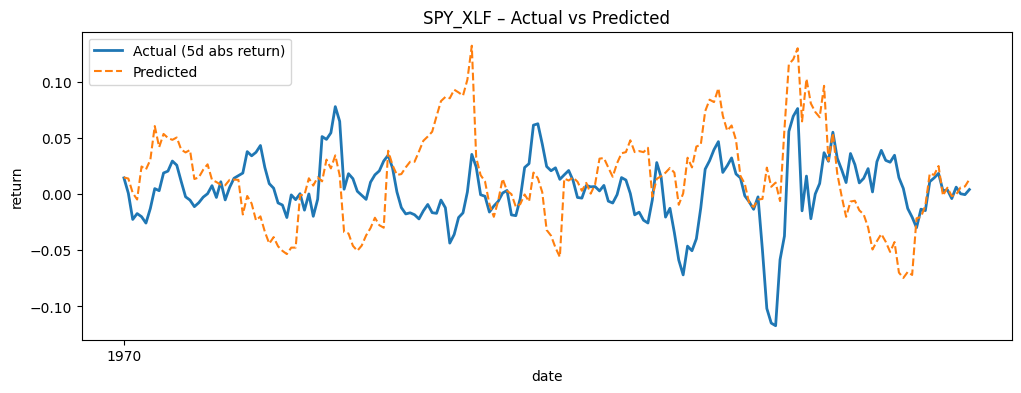

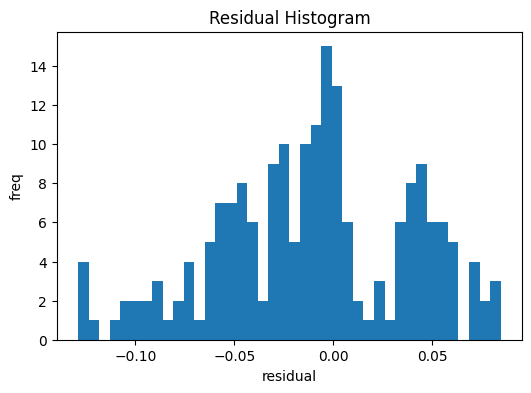

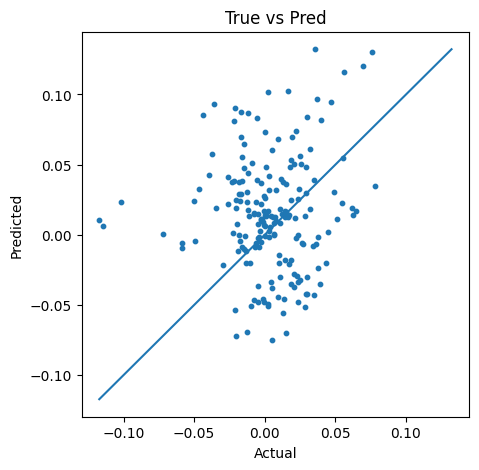

In [ ]:
# A5) 可视化（时间序列、残差直方图、散点）
import matplotlib.pyplot as plt

# 时序对比
plt.figure(figsize=(12,4))
plt.plot(df_pred.index, y_true, label='Actual (5d abs return)', linewidth=2)
plt.plot(df_pred.index, y_hat,  label='Predicted', linestyle='--')
plt.legend(); plt.title('SPY_XLF – Actual vs Predicted'); plt.xlabel('date'); plt.ylabel('return')
plt.show()

# 残差分布
resid = (y_true - y_hat).dropna()
plt.figure(figsize=(6,4))
plt.hist(resid, bins=40)
plt.title('Residual Histogram'); plt.xlabel('residual'); plt.ylabel('freq')
plt.show()

# 真值 vs 预测 散点（含y=x）
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_hat, s=10)
lo = float(min(y_true.min(), y_hat.min())); hi = float(max(y_true.max(), y_hat.max()))
xs = np.linspace(lo, hi, 100); plt.plot(xs, xs)
plt.title('True vs Pred'); plt.xlabel('Actual'); plt.ylabel('Predicted')
plt.show()

In [ ]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from math import isfinite
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings; warnings.simplefilter("ignore", ConvergenceWarning)

OUTDIR = "./forecast_outputs_arimax"
os.makedirs(OUTDIR, exist_ok=True)

In [ ]:
def ensure_datetime_index(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    if 'Date' in out.columns:
        out['Date'] = pd.to_datetime(out['Date'])
        out = out.sort_values('Date').set_index('Date')
    elif not isinstance(out.index, pd.DatetimeIndex):
        raise ValueError("Need a 'Date' column or DatetimeIndex.")
    return out

def make_target_future5(df: pd.DataFrame, etf: str) -> pd.DataFrame:
    out = df.copy()
    price_col = f"{etf}_AdjClose"
    if price_col not in out.columns:
        cand = [c for c in out.columns if c.endswith("_AdjClose") and c != "SPY_AdjClose"]
        if len(cand) != 1:
            raise KeyError("Cannot infer ETF AdjClose column.")
        price_col = cand[0]
    out["future_return_5d"] = out[price_col].shift(-5) / out[price_col] - 1.0
    return out

def _is_factor_col(c: str) -> bool:
    bad = ("Open","High","Low","Close","AdjClose","Volume","Div","Split")
    if any(b in c for b in bad): return False
    if "future_return" in c.lower(): return False
    if c.lower() in ("date","datetime"): return False
    return True

def select_topk_exog(df: pd.DataFrame, k=20, include_spy=True):
    # 仅数值列候选
    num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    cand = [c for c in num_cols if _is_factor_col(c)]
    if not include_spy:
        cand = [c for c in cand if not c.startswith("SPY_")]
    # 计算与目标的Spearman相关
    cor = df[cand].corrwith(df["future_return_5d"], method="spearman").abs().sort_values(ascending=False)
    topk = list(cor.head(k).index)
    return topk, cor

def train_test_split_time(df: pd.DataFrame, test_size=0.2):
    n = len(df); n_test = max(1, int(n*test_size)); n_tr = n - n_test
    return df.iloc[:n_tr].copy(), df.iloc[n_tr:].copy()

def zscore_train_test(train: pd.DataFrame, test: pd.DataFrame, feature_cols):
    mu = train[feature_cols].mean()
    sd = train[feature_cols].std().replace(0, 1.0)
    X_tr = (train[feature_cols]-mu)/sd
    X_te = (test[feature_cols]-mu)/sd
    # 清 NaN/Inf
    X_tr = X_tr.replace([np.inf,-np.inf], np.nan).dropna()
    y_tr = train.loc[X_tr.index, "future_return_5d"]
    X_te = X_te.replace([np.inf,-np.inf], np.nan).dropna()
    y_te = test.loc[X_te.index, "future_return_5d"]
    return X_tr, X_te, y_tr, y_te

def fit_sarimax(y, exog, order):
    m = SARIMAX(y, exog=exog, order=order, enforce_stationarity=False, enforce_invertibility=False)
    return m.fit(disp=False)

def small_order_grid():
    # 小而靠谱的 (p,d,q) 组合
    return [(0,1,0),(1,1,0),(0,1,1),(1,1,1),(2,1,1),(2,0,2)]

def gridsearch_best(y, exog=None, orders=None, criterion="aic"):
    if orders is None: orders = small_order_grid()
    best_val, best_order, best_res = np.inf, None, None
    for od in orders:
        try:
            res = fit_sarimax(y, exog, od)
            val = getattr(res, criterion)
            if isfinite(val) and val < best_val:
                best_val, best_order, best_res = val, od, res
        except Exception:
            continue
    return best_order, best_res

def walk_forward(y_full: pd.Series, X_full: pd.DataFrame|None, start_idx: int, order, refit_interval=20):
    idx = y_full.index; preds = []; pred_idx = []; res = None
    for i in range(start_idx, len(y_full)):
        y_tr = y_full.iloc[:i]
        X_tr = X_full.iloc[:i] if X_full is not None else None
        X_f  = X_full.iloc[i:i+1] if X_full is not None else None
        if (i-start_idx)%refit_interval==0 or res is None:
            try:
                res = fit_sarimax(y_tr, X_tr, order)
            except Exception:
                res = fit_sarimax(y_tr, None, order)
        try:
            y_hat = res.get_forecast(steps=1, exog=X_f).predicted_mean.iloc[0]
        except Exception:
            y_hat = float(y_tr.mean()) if len(y_tr)>0 else 0.0
        preds.append(y_hat); pred_idx.append(idx[i])
    return pd.Series(preds, index=pd.DatetimeIndex(pred_idx), name="y_pred")

def evaluate(y_true: pd.Series, y_pred: pd.Series):
    y_true, y_pred = y_true.align(y_pred, join="inner")
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / (y_true.replace(0,np.nan))))*100
    da   = (np.sign(y_pred)==np.sign(y_true)).mean()
    return {"MAE":mae, "RMSE":rmse, "MAPE%":mape, "Directional_Acc":da}

ARIMAX metrics: {'MAE': 0.03389058442109682, 'RMSE': 0.044376307489535506, 'MAPE%': 604.3156813180923, 'Directional_Acc': 0.5129533678756477} best_order: (2, 0, 2)


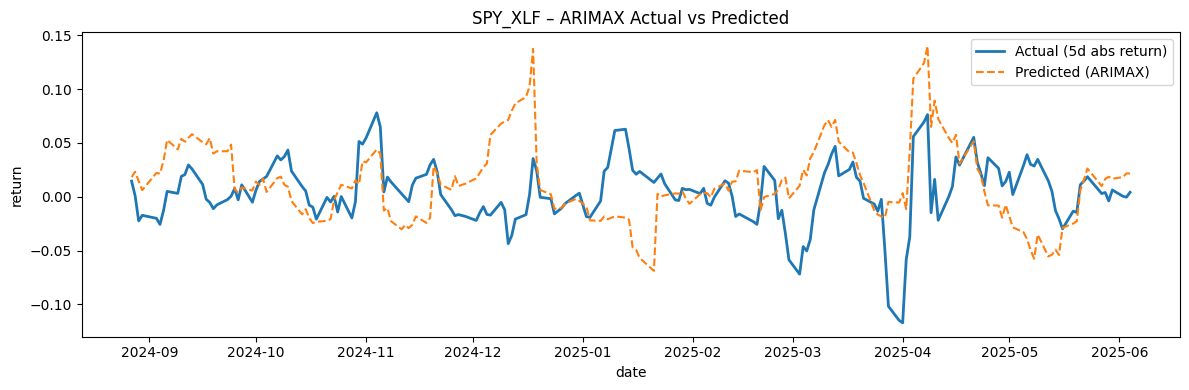

In [ ]:
# —— Data & target
etf = "XLF"
df_src = all_dataframes['SPY_XLF'].copy()
df0 = ensure_datetime_index(df_src)
df1 = make_target_future5(df0, etf=etf).dropna(subset=["future_return_5d"])

# —— 选择外生变量 Top‑K
topK, corr_series = select_topk_exog(df1, k=20, include_spy=True)

# —— 组织仅需列（提高速度稳定性）
keep_cols = ["future_return_5d"] + topK
df_feat = df1[keep_cols].dropna()

# —— 时序切分 + 标准化
train_df, test_df = train_test_split_time(df_feat, test_size=0.2)
X_tr, X_te, y_tr, y_te = zscore_train_test(train_df, test_df, topK)

# —— Gridsearch 选 (p,d,q)
best_od_arimax, _ = gridsearch_best(y_tr, exog=X_tr, orders=None, criterion="aic")

# —— Walk‑forward 回测
y_full = pd.concat([y_tr, y_te])
X_full = pd.concat([X_tr, X_te])
start_idx = len(y_tr)
y_pred_ax = walk_forward(y_full, X_full, start_idx, order=best_od_arimax, refit_interval=20)

# —— 评估 & 导出
metrics_ax = evaluate(y_te, y_pred_ax)
print("ARIMAX metrics:", metrics_ax, "best_order:", best_od_arimax)

pred_ax = pd.DataFrame({"y_true": y_te.reindex(y_pred_ax.index), "y_pred": y_pred_ax}).dropna()
pred_ax.to_csv(f"{OUTDIR}/SPY_XLF_ARIMAX_predictions.csv")

# —— 可视化
plt.figure(figsize=(12,4))
plt.plot(pred_ax.index, pred_ax["y_true"], label="Actual (5d abs return)", linewidth=2)
plt.plot(pred_ax.index, pred_ax["y_pred"], label="Predicted (ARIMAX)", linestyle="--")
plt.legend(); plt.title("SPY_XLF – ARIMAX Actual vs Predicted"); plt.xlabel("date"); plt.ylabel("return")
plt.tight_layout(); plt.savefig(f"{OUTDIR}/SPY_XLF_ARIMAX_actual_vs_pred.png"); plt.show()

ARIMA metrics: {'MAE': 0.027294986862942034, 'RMSE': 0.03932609459967146, 'MAPE%': 444.83958533328087, 'Directional_Acc': 0.5895953757225434} best_order: (2, 0, 2)


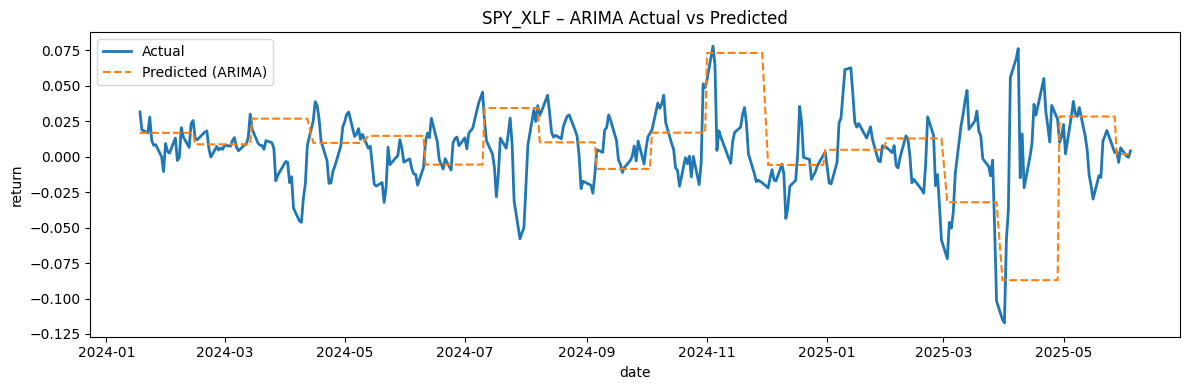

In [ ]:
# —— 只用目标列
df_tar = df1[["future_return_5d"]].dropna()
train_df_b, test_df_b = train_test_split_time(df_tar, test_size=0.2)
y_tr_b, y_te_b = train_df_b["future_return_5d"], test_df_b["future_return_5d"]

# —— Gridsearch
best_od_arima, _ = gridsearch_best(y_tr_b, exog=None, orders=None, criterion="aic")

# —— Walk‑forward
y_full_b = pd.concat([y_tr_b, y_te_b])
y_pred_a = walk_forward(y_full_b, X_full=None, start_idx=len(y_tr_b), order=best_od_arima, refit_interval=20)

# —— 评估 & 导出
metrics_a = evaluate(y_te_b, y_pred_a)
print("ARIMA metrics:", metrics_a, "best_order:", best_od_arima)

pred_a = pd.DataFrame({"y_true": y_te_b.reindex(y_pred_a.index), "y_pred": y_pred_a}).dropna()
pred_a.to_csv(f"{OUTDIR}/SPY_XLF_ARIMA_predictions.csv")

plt.figure(figsize=(12,4))
plt.plot(pred_a.index, pred_a["y_true"], label="Actual", linewidth=2)
plt.plot(pred_a.index, pred_a["y_pred"], label="Predicted (ARIMA)", linestyle="--")
plt.legend(); plt.title("SPY_XLF – ARIMA Actual vs Predicted"); plt.xlabel("date"); plt.ylabel("return")
plt.tight_layout(); plt.savefig(f"{OUTDIR}/SPY_XLF_ARIMA_actual_vs_pred.png"); plt.show()

In [ ]:
# 对齐到共同测试区间
common_idx = pred_ax.index.intersection(pred_a.index)
yt = pred_ax.loc[common_idx, "y_true"]
yhat_ax = pred_ax.loc[common_idx, "y_pred"]
yhat_a  = pred_a.loc[common_idx, "y_pred"]

# Naïve：用真实值滞后5天作为预测
y_naive = yt.shift(5)
mask = y_naive.notna(); yt2 = yt[mask]; yhat_n = y_naive[mask]
def _eval(y1, y2):
    return {
        "MAE": mean_absolute_error(y1, y2),
        "RMSE": np.sqrt(mean_squared_error(y1, y2)),
        "MAPE%": np.mean(np.abs((y1 - y2) / (y1.replace(0, np.nan))))*100,
        "Directional_Acc": (np.sign(y2)==np.sign(y1)).mean()
    }

m_ax = _eval(yt, yhat_ax)
m_a  = _eval(yt, yhat_a)
m_n  = _eval(yt2, yhat_n)

cmp = pd.DataFrame([m_a, m_ax, m_n], index=["ARIMA", "ARIMAX", "Naïve"]).round(4)
cmp

,MAE,RMSE,MAPE%,Directional_Acc
ARIMA,0.0331,0.0468,622.9959,0.5699
ARIMAX,0.0339,0.0444,604.3157,0.5130
Naïve,0.0317,0.0443,570.3391,0.5160


In [139]:
#优化
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings; warnings.simplefilter("ignore", ConvergenceWarning)

OUTDIR = "./forecast_outputs_arimax_opt"
os.makedirs(OUTDIR, exist_ok=True)

In [140]:
def ensure_datetime_index(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    if 'Date' in out.columns:
        out['Date'] = pd.to_datetime(out['Date'])
        out = out.sort_values('Date').set_index('Date')
    elif not isinstance(out.index, pd.DatetimeIndex):
        raise ValueError("Need a 'Date' column or DatetimeIndex.")
    return out

def make_target_future5(df: pd.DataFrame, etf: str) -> pd.DataFrame:
    out = df.copy()
    price_col = f"{etf}_AdjClose"
    if price_col not in out.columns:
        cand = [c for c in out.columns if c.endswith("_AdjClose") and c != "SPY_AdjClose"]
        if len(cand)!=1: raise KeyError("Cannot infer AdjClose col")
        price_col = cand[0]
    out["future_return_5d"] = out[price_col].shift(-5)/out[price_col]-1.0
    return out

def _is_factor(c: str) -> bool:
    bad = ("Open","High","Low","Close","AdjClose","Volume","Div","Split")
    if any(b in c for b in bad): return False
    if "future_return" in c.lower(): return False
    if c.lower() in ("date","datetime"): return False
    return True

def winsorize(df, q=0.005):
    # 两侧裁剪，抑制极端值
    lo, hi = df.quantile(q), df.quantile(1-q)
    return df.clip(lower=lo, upper=hi, axis=1)

def corr_topk(df, target_col, candidates, k=20):
    cor = df[candidates].corrwith(df[target_col], method="spearman").abs().sort_values(ascending=False)
    return list(cor.head(k).index), cor

def remove_high_corr(cols, df, thr=0.92):
    # 逐列剔除与已选列相关性过高者（简单去多重共线）
    kept = []
    for c in cols:
        if not kept:
            kept.append(c); continue
        ok = True
        for kc in kept:
            r = abs(df[[c,kc]].corr().iloc[0,1])
            if r>=thr:
                ok=False; break
        if ok: kept.append(c)
    return kept

def add_lags_and_rolls(df, cols, lags=(1,5,10), roll=(5,10)):
    out = df.copy()
    for c in cols:
        for L in lags:
            out[f"{c}_lag{L}"] = out[c].shift(L)
        for R in roll:
            out[f"{c}_ema{R}"] = out[c].ewm(span=R, adjust=False).mean()
    return out

def train_test_split_time(df, test_size=0.2):
    n=len(df); n_te=max(1,int(n*test_size)); n_tr=n-n_te
    return df.iloc[:n_tr].copy(), df.iloc[n_tr:].copy()

def zscore_train_test(train, test, feature_cols):
    mu = train[feature_cols].mean(); sd = train[feature_cols].std().replace(0,1.0)
    X_tr = ((train[feature_cols]-mu)/sd).replace([np.inf,-np.inf], np.nan).dropna()
    y_tr = train.loc[X_tr.index,"future_return_5d"]
    X_te = ((test[feature_cols]-mu)/sd).replace([np.inf,-np.inf], np.nan).dropna()
    y_te = test.loc[X_te.index,"future_return_5d"]
    return X_tr, X_te, y_tr, y_te

def fit_sarimax(y, exog, order):
    m = SARIMAX(y, exog=exog, order=order, enforce_stationarity=False, enforce_invertibility=False)
    return m.fit(disp=False)

def small_order_grid():  # 小但常用的组合
    return [(0,1,0),(1,1,0),(0,1,1),(1,1,1),(2,1,1)]

def gridsearch_best(y, exog, orders=None, criterion="aic"):
    if orders is None: orders = small_order_grid()
    best_val, best_order, best_res = np.inf, None, None
    for od in orders:
        try:
            res = fit_sarimax(y, exog, od)
            val = getattr(res, criterion)
            if np.isfinite(val) and val<best_val:
                best_val, best_order, best_res = val, od, res
        except Exception:
            pass
    return best_order, best_res

def walk_forward(y_full, X_full, start_idx, order, refit_interval=20):
    idx=y_full.index; preds=[]; pred_idx=[]; res=None
    for i in range(start_idx, len(y_full)):
        y_tr = y_full.iloc[:i]
        X_tr = X_full.iloc[:i] if X_full is not None else None
        X_f  = X_full.iloc[i:i+1] if X_full is not None else None
        if (i-start_idx)%refit_interval==0 or res is None:
            try:   res = fit_sarimax(y_tr, X_tr, order)
            except: res = fit_sarimax(y_tr, None, order)
        try:   y_hat = res.get_forecast(steps=1, exog=X_f).predicted_mean.iloc[0]
        except: y_hat = float(y_tr.mean()) if len(y_tr)>0 else 0.0
        preds.append(y_hat); pred_idx.append(idx[i])
    return pd.Series(preds, index=pd.DatetimeIndex(pred_idx), name="y_pred")

def evaluate(y_true, y_pred):
    y_true, y_pred = y_true.align(y_pred, join="inner")
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # MAPE 对接近0很敏感，这里给个稳健版（分母>=1e-6）
    denom = y_true.copy().abs()
    denom[denom<1e-6]=1e-6
    mape = np.mean(np.abs((y_true - y_pred)/denom))*100
    da   = (np.sign(y_pred)==np.sign(y_true)).mean()
    return {"MAE":mae, "RMSE":rmse, "MAPE%":mape, "Directional_Acc":da}

def calibrate_pred(y_true, y_pred):
    # 对预测做线性标定，抑制振幅（y ≈ a + b * pred）
    y_true, y_pred = y_true.align(y_pred, join="inner")
    A = np.vstack([np.ones(len(y_pred)), y_pred.values]).T
    # 最小二乘
    coef = np.linalg.lstsq(A, y_true.values, rcond=None)[0]
    a,b = coef[0], coef[1]
    y_cal = a + b*y_pred
    return y_cal.rename("y_pred_cal"), (a,b)

In [ ]:
# 数据与目标
etf = "XLF"
df_raw = ensure_datetime_index(all_dataframes['SPY_XLF'])
df_tgt = make_target_future5(df_raw, etf=etf)

# 候选特征 = 所有数值因子列（排除原始价量）
candidates = [c for c in df_tgt.columns if _is_factor(c)]
# 先 winsorize 抑制极端值
df_ws = df_tgt.copy()
df_ws[candidates] = winsorize(df_ws[candidates], q=0.005)

# 相关性选 Top‑K
topK, cor_series = corr_topk(df_ws.dropna(), "future_return_5d", candidates, k=24)

# 去高度相关（>0.92）
topK_decol = remove_high_corr(topK, df_ws, thr=0.92)

# 滞后 & EMA 扩展特征
df_feat0 = add_lags_and_rolls(df_ws, topK_decol, lags=(1,5,10), roll=(5,10))

# 只保留目标 + 扩展后的特征
feature_cols = [c for c in df_feat0.columns if c!="future_return_5d" and _is_factor(c)]
df_feat = df_feat0[["future_return_5d"] + feature_cols].dropna()

In [ ]:
# 为了速度，定义一个小网格
K_grid = [12, 18]         # 取前K个特征
REFIT_grid = [20, 60]     # 重拟合间隔
orders = small_order_grid()

best_score = np.inf
best_conf  = None
best_pack  = None

for K in K_grid:
    colsK = feature_cols[:K]
    train_df, test_df = train_test_split_time(df_feat[["future_return_5d"]+colsK], test_size=0.2)
    X_tr, X_te, y_tr, y_te = zscore_train_test(train_df, test_df, colsK)
    y_full = pd.concat([y_tr, y_te])
    X_full = pd.concat([X_tr, X_te])

    # 对每个 K，先选 (p,d,q)
    od, _ = gridsearch_best(y_tr, exog=X_tr, orders=orders, criterion="aic")
    if od is None: 
        continue

    for R in REFIT_grid:
        y_pred = walk_forward(y_full, X_full, start_idx=len(y_tr), order=od, refit_interval=R)
        m = evaluate(y_te, y_pred)
        if m["RMSE"] < best_score:
            best_score = m["RMSE"]
            best_conf  = {"K":K, "order":od, "refit":R, "metrics":m}
            best_pack  = (colsK, (train_df, test_df), (X_tr, X_te, y_tr, y_te), (y_full, X_full), y_pred)

best_conf

{'K': 18,
 'order': (1, 1, 0),
 'refit': 20,
 'metrics': {'MAE': 0.03096845613301836,
  'RMSE': 0.04189626450447368,
  'MAPE%': 546.8085429212962,
  'Directional_Acc': 0.5129533678756477}}

Best config: {'K': 18, 'order': (1, 1, 0), 'refit': 20, 'metrics': {'MAE': 0.03096845613301836, 'RMSE': 0.04189626450447368, 'MAPE%': 546.8085429212962, 'Directional_Acc': 0.5129533678756477}}
ARIMAX raw : {'MAE': 0.03096845613301836, 'RMSE': 0.04189626450447368, 'MAPE%': 546.8085429212962, 'Directional_Acc': 0.5129533678756477}
ARIMAX cal : {'MAE': 0.02107934520978755, 'RMSE': 0.02894849884842115, 'MAPE%': 157.14070371025875, 'Directional_Acc': 0.5699481865284974} | calib (a,b) = (0.003236650268292309, 0.04174619542132582)


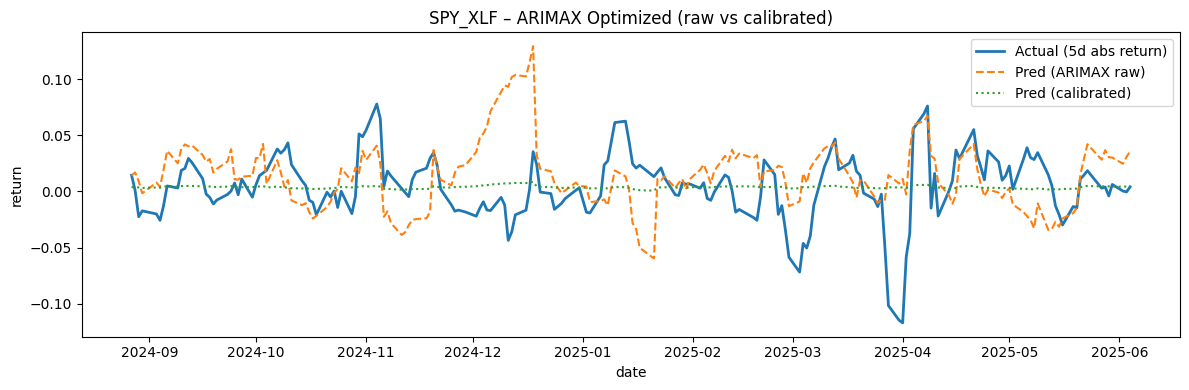

In [ ]:
colsK, (train_df, test_df), (X_tr, X_te, y_tr, y_te), (y_full, X_full), y_pred = best_pack
# 预测后线性标定
y_cal, (a_cal, b_cal) = calibrate_pred(y_te, y_pred)

m_raw = evaluate(y_te, y_pred)
m_cal = evaluate(y_te, y_cal)

print("Best config:", best_conf)
print("ARIMAX raw :", m_raw)
print("ARIMAX cal :", m_cal, "| calib (a,b) =", (a_cal, b_cal))

# 保存预测
pred_ax_opt = pd.DataFrame({
    "y_true": y_te.reindex(y_pred.index),
    "y_pred_raw": y_pred,
    "y_pred_cal": y_cal
}).dropna()
pred_ax_opt.to_csv(f"{OUTDIR}/SPY_XLF_ARIMAX_OPT_predictions.csv")

# 可视化
plt.figure(figsize=(12,4))
plt.plot(pred_ax_opt.index, pred_ax_opt["y_true"], label="Actual (5d abs return)", linewidth=2)
plt.plot(pred_ax_opt.index, pred_ax_opt["y_pred_raw"], label="Pred (ARIMAX raw)", linestyle="--")
plt.plot(pred_ax_opt.index, pred_ax_opt["y_pred_cal"], label="Pred (calibrated)", linestyle=":")
plt.legend(); plt.title("SPY_XLF – ARIMAX Optimized (raw vs calibrated)")
plt.xlabel("date"); plt.ylabel("return"); plt.tight_layout()
plt.savefig(f"{OUTDIR}/SPY_XLF_ARIMAX_OPT_actual_vs_pred.png"); plt.show()

In [ ]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import mean_absolute_error, mean_squared_error

# —— 路径
ARIMA_PATH = "./forecast_outputs/SPY_XLF_ARIMA_predictions.csv"

# —— 如果 pred_arima 不在内存里，先尝试读文件；读不到就重算
need_build = False
try:
    pred_arima  # noqa
except NameError:
    need_build = True

if need_build:
    if Path(ARIMA_PATH).exists():
        pred_arima = pd.read_csv(ARIMA_PATH, index_col=0, parse_dates=True)
    else:
        # ===== 现场重算 ARIMA baseline =====
        # 依赖：你前面已定义过这些函数：ensure_datetime_index, make_target_future5,
        #       train_test_split_time, gridsearch_best, walk_forward
        etf = "XLF"
        df_raw = ensure_datetime_index(all_dataframes['SPY_XLF'])
        df1 = make_target_future5(df_raw, etf=etf).dropna(subset=["future_return_5d"])

        df_tar = df1[["future_return_5d"]].dropna()
        train_df_b, test_df_b = train_test_split_time(df_tar, test_size=0.2)
        y_tr_b, y_te_b = train_df_b["future_return_5d"], test_df_b["future_return_5d"]

        best_od_arima, _ = gridsearch_best(y_tr_b, exog=None, orders=None, criterion="aic")

        y_full_b = pd.concat([y_tr_b, y_te_b])
        y_pred_a = walk_forward(
            y_full_b, X_full=None, start_idx=len(y_tr_b),
            order=best_od_arima, refit_interval=20
        )

        pred_arima = pd.DataFrame({
            "y_true": y_te_b.reindex(y_pred_a.index),
            "y_pred": y_pred_a
        }).dropna()

        # 保存一下，方便复现
        Path(os.path.dirname(ARIMA_PATH) or ".").mkdir(parents=True, exist_ok=True)
        pred_arima.to_csv(ARIMA_PATH)

# ========= 与 ARIMAX-OPT 结果对齐并对比 =========
# 依赖：你前面已得到 pred_ax_opt（包含 y_true, y_pred_raw, y_pred_cal）
common = pred_ax_opt.index.intersection(pred_arima.index)

yt       = pred_ax_opt.loc[common, "y_true"]
y_arima  = pred_arima.loc[common, "y_pred"]
y_ax_raw = pred_ax_opt.loc[common, "y_pred_raw"]
y_ax_cal = pred_ax_opt.loc[common, "y_pred_cal"]
y_naive  = yt.shift(5)

def _eval(y1, y2):
    return {
        "MAE": mean_absolute_error(y1, y2),
        "RMSE": np.sqrt(mean_squared_error(y1, y2)),
        "MAPE%": np.mean(np.abs((y1 - y2) / np.where(np.abs(y1)<1e-6, 1e-6, np.abs(y1)))) * 100,
        "Directional_Acc": (np.sign(y2) == np.sign(y1)).mean()
    }

mask = y_naive.notna()
m_arima = _eval(yt,       y_arima)
m_axraw = _eval(yt,       y_ax_raw)
m_axcal = _eval(yt,       y_ax_cal)
m_naive = _eval(yt[mask], y_naive[mask])

pd.DataFrame(
    [m_arima, m_axraw, m_axcal, m_naive],
    index=["ARIMA", "ARIMAX(raw)", "ARIMAX(calibrated)", "Naïve"]
).round(4)

,MAE,RMSE,MAPE%,Directional_Acc
ARIMA,0.0353,0.0505,691.9474,0.5699
ARIMAX(raw),0.0310,0.0419,546.8085,0.5130
ARIMAX(calibrated),0.0211,0.0289,157.1407,0.5699
Naïve,0.0317,0.0443,570.3391,0.5160


In [ ]:
key = next(iter(all_dataframes)) if "all_dataframes" in globals() else None  # 自动挑第一个
print("示例数据集：", key)

df_sample = all_dataframes[key].copy() if key else None
if df_sample is not None:
    print(df_sample.head(3))
    print("\n列名总数：", len(df_sample.columns))
    print(df_sample.columns.tolist()[:30])  # 只展示前30个
    print("\n各列dtype：")
    print(df_sample.dtypes.head(20))
else:
    print("⚠️ 没拿到示例数据集。请确认 all_dataframes 已定义。")

示例数据集： SPY_XLF
         Date  SPY_AdjClose  XLF_AdjClose  SPY_Volume  XLF_Volume    SPY_High  \
0  2018-07-17    251.073486     23.987967    52315500    55502200  280.910004   
1  2018-07-18    251.601639     24.371916    44593500    59109200  281.179993   
2  2018-07-19    250.652740     24.005419    61412100    61765100  280.739990   

    XLF_High     SPY_Low    XLF_Low  XLF_momentum_1w  ...  EXPINF2YR  \
0  27.600000  278.410004  27.340000              NaN  ...   2.048543   
1  27.980000  280.059998  27.559999              NaN  ...   2.048543   
2  27.799999  279.459991  27.469999              NaN  ...   2.048543   

   EXPINF3YR  EXPINF5YR  EXPINF10YR  EXPINF20YR  EXPINF30YR  WEI  ICSA  NFCI  \
0   2.028422   2.031595    2.095718    2.227663    2.324079  NaN   NaN   NaN   
1   2.028422   2.031595    2.095718    2.227663    2.324079  NaN   NaN   NaN   
2   2.028422   2.031595    2.095718    2.227663    2.324079  NaN   NaN   NaN   

       NTFS  
0  0.834613  
1  0.855895  
2  0.817

In [ ]:
# 运行你之前的数据生成 Notebook（路径按你的工程实际改一改）
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os, glob, pandas as pd

def ensure_dt_index(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    if 'Date' in out.columns:
        out['Date'] = pd.to_datetime(out['Date'], errors='coerce')
        out = (out.dropna(subset=['Date'])
                  .sort_values('Date')
                  .drop_duplicates('Date')
                  .set_index('Date'))
    else:
        out.index = pd.to_datetime(out.index, errors='coerce')
        out = out[~out.index.isna()].sort_index()
    return out

# ---- 安全工具函数 ----
def colname_strs(cols):
    """把列名统一转成字符串，方便 endswith 判断"""
    return [str(c) for c in cols]

def has_adjclose(df: pd.DataFrame) -> bool:
    """判断是否包含 *_AdjClose 列（容忍 tuple/MultiIndex 列名）"""
    return any(s.endswith('_AdjClose') for s in colname_strs(df.columns))

# 1) 从全局变量里收集 DataFrame
def build_from_globals():
    out = {}
    for name, obj in globals().items():
        if isinstance(obj, pd.DataFrame):
            df = obj
            if has_adjclose(df):
                out[name] = ensure_dt_index(df)
    return out

# 2) 扫描磁盘目录（如有）
def build_from_folder(data_dir="./data"):
    out = {}
    if not os.path.isdir(data_dir):
        return out
    files = glob.glob(os.path.join(data_dir, "**/*.csv"), recursive=True) + \
            glob.glob(os.path.join(data_dir, "**/*.parquet"), recursive=True)
    for fp in files:
        try:
            df = pd.read_parquet(fp) if fp.endswith(".parquet") else pd.read_csv(fp)
            if has_adjclose(df):
                key = os.path.splitext(os.path.basename(fp))[0]
                out[key] = ensure_dt_index(df)
        except Exception as e:
            # 这里不要静默吞掉，给个提示方便排查
            print(f"[WARN] 读取失败: {fp} -> {e}")
    return out

# 3) 从“大表”拆分（如果你有一个包含多只ETF列的 DataFrame）
def build_from_big_table(var_names=('df_all','df','data','master')):
    out = {}
    for v in var_names:
        if v in globals() and isinstance(globals()[v], pd.DataFrame):
            big = ensure_dt_index(globals()[v])
            cols = colname_strs(big.columns)
            price_cols = [c for c in cols if c.endswith('_AdjClose')]
            for pc in price_cols:
                etf = pc[:-9]  # 去掉 '_AdjClose'
                key = f"SPY_{etf}" if etf != 'SPY' else 'SPY'
                out[key] = big.copy()  # 如需只保留该 ETF 相关列，可在此处筛列
            break
    return out

# ---- 组装 all_dataframes ----
all_dataframes = {}
all_dataframes.update(build_from_globals())
if not all_dataframes:
    all_dataframes.update(build_from_folder("./data"))
if not all_dataframes:
    all_dataframes.update(build_from_big_table())

# 兜底保护：避免 next(iter(...)) 在空字典时报 StopIteration
if not all_dataframes:
    print("⚠️ 未收集到任何数据集。请先运行数据加载/生成部分。")
else:
    keys = list(all_dataframes.keys())
    print(f"收集到 {len(keys)} 个数据集。示例 keys：", keys[:8])
    k = keys[0]
    print("示例数据集：", k, "形状：", all_dataframes[k].shape)

收集到 25 个数据集。示例 keys： ['df_xlc', 'df_xlf', 'df', 'sample_df', 'SPY_XLF', 'SPY_XLC', 'SPY_XLY', 'SPY_XLP']
示例数据集： df_xlc 形状： (1736, 91)


In [ ]:
import pandas as pd
import numpy as np

# —— 1. 找到 XLV 对应的 DataFrame —— #
def pick_df_for_xlv(all_dataframes):
    # 优先找 key == 'SPY_XLV'
    if 'SPY_XLV' in all_dataframes:
        return 'SPY_XLV', all_dataframes['SPY_XLV'].copy()
    # 否则找包含 XLV_AdjClose 的那份
    for k, df in all_dataframes.items():
        if any(c.endswith('_AdjClose') and c.startswith('XLV_') for c in df.columns):
            return k, df.copy()
    # 再否则，找唯一含 XLV_AdjClose 的表
    for k, df in all_dataframes.items():
        if 'XLV_AdjClose' in df.columns:
            return k, df.copy()
    raise KeyError("在 all_dataframes 里没有找到包含 XLV_AdjClose 的数据集。请先生成/加载 SPY_XLV。")

key, df_xlv = pick_df_for_xlv(all_dataframes)
print("使用的数据集 key:", key, "形状:", df_xlv.shape)

# —— 2. 规范索引（交易日频率 & 前向填充） —— #
def ensure_bday(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    if 'Date' in out.columns:
        out['Date'] = pd.to_datetime(out['Date'], errors='coerce')
        out = out.dropna(subset=['Date']).sort_values('Date').drop_duplicates('Date').set_index('Date')
    else:
        out.index = pd.to_datetime(out.index, errors='coerce')
        out = out[~out.index.isna()].sort_index()
    new_idx = pd.date_range(out.index.min(), out.index.max(), freq='B')
    out = out.reindex(new_idx)
    num_cols = [c for c in out.columns if pd.api.types.is_numeric_dtype(out[c])]
    out[num_cols] = out[num_cols].ffill()
    return out

df_xlv = ensure_bday(df_xlv)

# —— 3. 构造目标：未来5日绝对收益 —— #
price_col = 'XLV_AdjClose'
if price_col not in df_xlv.columns:
    raise KeyError(f"缺少 {price_col} 列。")

df_xlv['future_return_5d'] = df_xlv[price_col].shift(-5)/df_xlv[price_col] - 1.0
df_xlv = df_xlv.dropna(subset=['future_return_5d'])

print("可用区间：", df_xlv.index.min(), "→", df_xlv.index.max(), "样本数：", len(df_xlv))

使用的数据集 key: SPY_XLV 形状: (1736, 91)
可用区间： 2018-07-17 00:00:00 → 2025-06-04 00:00:00 样本数： 1797


ARIMAX 使用的外生变量（TopK）: ['XLV_volatility_21d', 'XLV_momentum_1w', 'XLV_sharpe_10d', 'XLV_KDJ_J', 'XLV_PriceBreakout', 'XLV_Bollinger_%b_10d', 'XLV_rsi_14d', 'XLV_MACD', 'XLV_momentum_1m', 'XLV_SPY_momentum_21d']

XLV 评估：
ARIMA       : {'MAE': 0.01725202532108051, 'RMSE': 0.022760965674999085, 'MAPE%': 3757.541823676521, 'Directional_Acc': 0.5295774647887324}
ARIMAX(raw) : {'MAE': 0.025889615510963228, 'RMSE': 0.0321166552817165, 'MAPE%': 2336.778693658387, 'Directional_Acc': 0.5154929577464789}


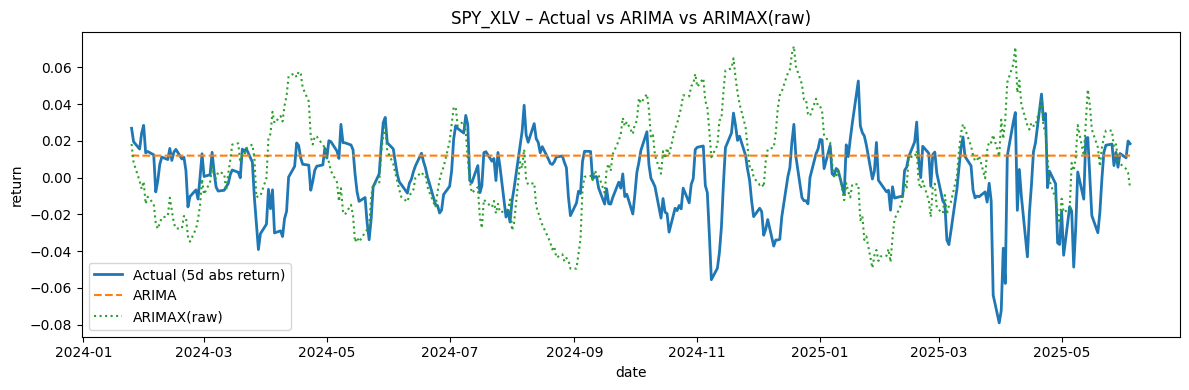

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

OUTDIR = "./forecast_outputs_XLV"
Path(OUTDIR).mkdir(parents=True, exist_ok=True)

TOPK = 10          # 外生变量只取前 10 个，提速
ORDER = (1,1,1)    # 统一 (p,d,q)
TEST_SIZE = 0.2    # 最后 20% 测试

def is_factor_col(c: str) -> bool:
    bad = ("Open","High","Low","Close","AdjClose","Volume","Div","Split")
    if not c.startswith("XLV_"):   # 只用 XLV_* 特征
        return False
    if any(b in c for b in bad):   # 去掉原始价量
        return False
    return True

def evaluate(y_true, y_pred):
    y_true, y_pred = y_true.align(y_pred, "inner")
    mae  = float(mean_absolute_error(y_true, y_pred))
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    denom = y_true.abs().clip(lower=1e-6)
    mape = float(np.mean(np.abs((y_true - y_pred)/denom))*100)
    da   = float((np.sign(y_pred)==np.sign(y_true)).mean())
    return {"MAE":mae,"RMSE":rmse,"MAPE%":mape,"Directional_Acc":da}

def fit_once_predict(y_tr, X_tr, y_te, X_te, order):
    res = SARIMAX(y_tr, exog=X_tr, order=order,
                  enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
    pm = res.get_forecast(steps=len(y_te), exog=X_te).predicted_mean
    pm.index = y_te.index
    return pm

# —— 1) 选外生变量（Spearman相关 TopK） —— #
factors = [c for c in df_xlv.columns if is_factor_col(c)]
tmp = df_xlv.dropna(subset=['future_return_5d'])
cor = tmp[factors].corrwith(tmp['future_return_5d'], method='spearman').abs().sort_values(ascending=False)
topk = list(cor.head(TOPK).index)
print("ARIMAX 使用的外生变量（TopK）:", topk)

# —— 2) 切分训练/测试，标准化特征 —— #
use_cols = ['future_return_5d'] + topk
d1 = df_xlv[use_cols].dropna()
n = len(d1); n_te = max(1,int(n*TEST_SIZE)); n_tr = n - n_te
train, test = d1.iloc[:n_tr], d1.iloc[n_tr:]

mu = train[topk].mean(); sd = train[topk].std().replace(0,1.0)
Xtr = ((train[topk]-mu)/sd).replace([np.inf,-np.inf], np.nan).dropna()
ytr = train.loc[Xtr.index, 'future_return_5d']
Xte = ((test[topk]-mu)/sd).replace([np.inf,-np.inf], np.nan).dropna()
yte = test.loc[Xte.index, 'future_return_5d']

# —— 3) 训练并预测（单次拟合，整段预测） —— #
y_pred_arimax = fit_once_predict(ytr, Xtr, yte, Xte, ORDER)   # ARIMAX(raw)
y_pred_arima  = fit_once_predict(ytr, None, yte, None, ORDER) # ARIMA

# —— 4) 指标 —— #
m_ax = evaluate(yte, y_pred_arimax)
m_a  = evaluate(yte, y_pred_arima)
print("\nXLV 评估：")
print("ARIMA       :", m_a)
print("ARIMAX(raw) :", m_ax)

# —— 5) 保存CSV + 出图 —— #
pd.DataFrame({"y_true":yte, "y_pred_arima":y_pred_arima}).to_csv(f"{OUTDIR}/SPY_XLV_ARIMA_preds.csv")
pd.DataFrame({"y_true":yte, "y_pred_arimax":y_pred_arimax}).to_csv(f"{OUTDIR}/SPY_XLV_ARIMAX_preds.csv")

plt.figure(figsize=(12,4))
plt.plot(yte.index, yte, label="Actual (5d abs return)", linewidth=2)
plt.plot(y_pred_arima.index,  y_pred_arima,  "--", label="ARIMA")
plt.plot(y_pred_arimax.index, y_pred_arimax, ":",  label="ARIMAX(raw)")
plt.legend(); plt.title("SPY_XLV – Actual vs ARIMA vs ARIMAX(raw)")
plt.xlabel("date"); plt.ylabel("return"); plt.tight_layout()
plt.savefig(f"{OUTDIR}/SPY_XLV_Actual_vs_ARIMA_ARIMAX.png"); plt.show()

候选TopK_BASE=18；经共线性剔除后实际使用 12 个外生变量：
['XLV_volatility_21d', 'XLV_momentum_1w', 'XLV_sharpe_10d', 'XLV_KDJ_J', 'XLV_PriceBreakout', 'XLV_rsi_14d', 'XLV_MACD', 'XLV_momentum_1m', 'XLV_SPY_momentum_21d', 'XLV_MFI_14d', 'XLV_ATR', 'XLV_SPY_volume_ratio']

=== XLV – 自动调参结果 ===
ARIMA  best order: (2, 1, 1) | metrics: {'MAE': 0.02000923514694971, 'RMSE': 0.024492264810325598, 'MAPE%': 3914.877412485705, 'Directional_Acc': 0.5014084507042254}
ARIMAX best order: (2, 1, 0) | metrics: {'MAE': 0.029550926979412567, 'RMSE': 0.036441891206669366, 'MAPE%': 10278.520164701815, 'Directional_Acc': 0.4704225352112676}


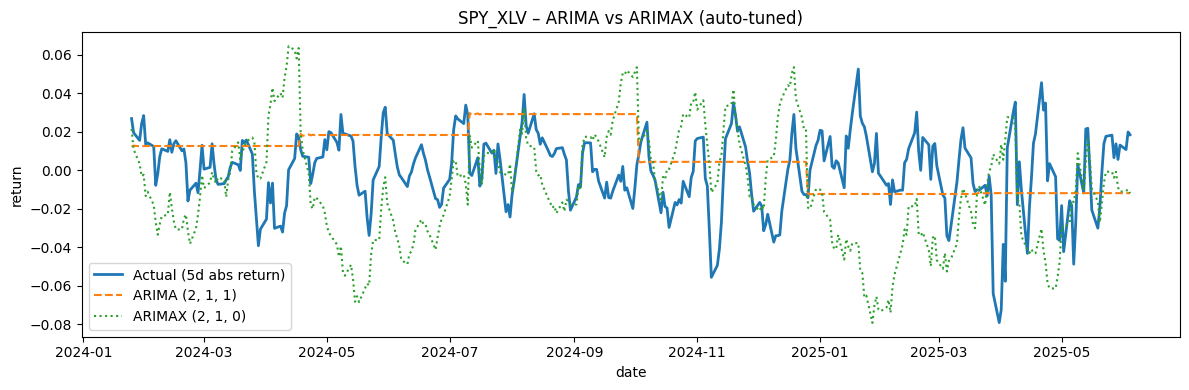

In [ ]:
# ================== XLV — ARIMAX Auto-Tune (order & features) ==================
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings; warnings.filterwarnings("ignore")

# -------- 参数（可调） --------
OUTDIR = "./forecast_outputs_XLV_tuned"
TOPK_BASE = 18              # 初选TopK候选
TOPK_USE  = 12              # 最终用于模型的特征数量
CORR_THR  = 0.92            # 共线性剔除阈值（绝对相关系数）
TEST_SIZE = 0.2
BLOCK     = 60              # 每60天重拟合一次
ORDERS_GRID = [             # 小网格（够用且不太慢）
    (0,1,0),(1,1,0),(0,1,1),(1,1,1),
    (2,1,0),(2,1,1),(2,1,2),(1,1,2)
]
Path(OUTDIR).mkdir(parents=True, exist_ok=True)

# ---- 取 XLV 的 DataFrame（沿用你前面的 pick 与 ensure_bday） ----
def pick_df_for_xlv(all_dataframes):
    if 'SPY_XLV' in all_dataframes:
        return 'SPY_XLV', all_dataframes['SPY_XLV'].copy()
    for k, df in all_dataframes.items():
        if 'XLV_AdjClose' in df.columns: return k, df.copy()
    raise KeyError("未找到包含 XLV_AdjClose 的数据集。")

def ensure_bday(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    if 'Date' in out.columns:
        out['Date'] = pd.to_datetime(out['Date'], errors='coerce')
        out = out.dropna(subset=['Date']).sort_values('Date').drop_duplicates('Date').set_index('Date')
    else:
        out.index = pd.to_datetime(out.index, errors='coerce')
        out = out[~out.index.isna()].sort_index()
    new_idx = pd.date_range(out.index.min(), out.index.max(), freq='B')
    out = out.reindex(new_idx)
    num_cols = [c for c in out.columns if pd.api.types.is_numeric_dtype(out[c])]
    out[num_cols] = out[num_cols].ffill()
    return out

key, df0 = pick_df_for_xlv(all_dataframes)
df0 = ensure_bday(df0)

price_col = "XLV_AdjClose"
df0["future_return_5d"] = df0[price_col].shift(-5)/df0[price_col] - 1.0
df0 = df0.dropna(subset=["future_return_5d"])

# ---- 因子筛选：只保留 XLV_* 且排除原始价量列 ----
def is_xlv_factor(c:str)->bool:
    if not c.startswith("XLV_"): return False
    bad = ("Open","High","Low","Close","AdjClose","Volume","Div","Split")
    return not any(b in c for b in bad)

factors_all = [c for c in df0.columns if is_xlv_factor(c)]

# 初筛：Spearman相关 TopK_BASE
tmp = df0.dropna(subset=["future_return_5d"])
spearman = tmp[factors_all].corrwith(tmp["future_return_5d"], method="spearman").abs().sort_values(ascending=False)
cands = list(spearman.head(TOPK_BASE).index)

# 共线性剔除
selected = []
for c in cands:
    ok = True
    for s in selected:
        r = abs(tmp[[c,s]].corr().iloc[0,1])
        if r >= CORR_THR:
            ok = False; break
    if ok:
        selected.append(c)
    if len(selected) >= TOPK_USE:
        break

print(f"候选TopK_BASE={TOPK_BASE}；经共线性剔除后实际使用 {len(selected)} 个外生变量：")
print(selected)

# ---- 组装数据，划分训练/测试，标准化外生变量 ----
use_cols = ["future_return_5d"] + selected
d1 = df0[use_cols].dropna()
n = len(d1); n_te = max(1,int(n*TEST_SIZE)); n_tr = n - n_te
train, test = d1.iloc[:n_tr], d1.iloc[n_tr:]

mu = train[selected].mean(); sd = train[selected].std().replace(0,1.0)
Xtr = ((train[selected]-mu)/sd).replace([np.inf,-np.inf], np.nan).dropna()
ytr = train.loc[Xtr.index,"future_return_5d"]
Xte = ((test[selected]-mu)/sd).replace([np.inf,-np.inf], np.nan).dropna()
yte = test.loc[Xte.index,"future_return_5d"]

# ---- 评估&预测工具 ----
def metrics(y_true, y_pred):
    y_true, y_pred = y_true.align(y_pred, "inner")
    mae  = float(mean_absolute_error(y_true, y_pred))
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    denom = y_true.abs().clip(lower=1e-6)
    mape = float(np.mean(np.abs((y_true - y_pred)/denom))*100)
    da   = float((np.sign(y_pred)==np.sign(y_true)).mean())
    return {"MAE":mae,"RMSE":rmse,"MAPE%":mape,"Directional_Acc":da}

def blockwise_predict(y_tr, X_tr, y_te, X_te, order, block=60):
    """分块滚动重拟合：稳且不太慢"""
    preds=[]
    for i in range(0, len(y_te), block):
        y_hist = pd.concat([y_tr, y_te.iloc[:i]])
        X_hist = pd.concat([X_tr, X_te.iloc[:i]]) if X_tr is not None else None
        y_blk  = y_te.iloc[i:i+block]
        X_blk  = X_te.iloc[i:i+block] if X_te is not None else None
        res = SARIMAX(y_hist, exog=X_hist, order=order,
                      enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
        fc = res.get_forecast(steps=len(y_blk), exog=X_blk).predicted_mean
        fc.index = y_blk.index
        preds.append(fc)
    return pd.concat(preds) if len(preds)>0 else pd.Series(dtype=float)

# ---- 1) 先给 ARIMA 找个合适的 (p,d,q) 作为 baseline ----
best_aic_arima, best_order_arima = np.inf, None
for od in ORDERS_GRID:
    try:
        res = SARIMAX(ytr, exog=None, order=od,
                      enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
        if res.aic < best_aic_arima:
            best_aic_arima, best_order_arima = res.aic, od
    except Exception:
        pass

y_pred_arima = blockwise_predict(ytr, None, yte, None, best_order_arima, block=BLOCK)
m_arima = metrics(yte, y_pred_arima)

# ---- 2) 给 ARIMAX 搜索最优 (p,d,q) ----
best_aic_ax, best_order_ax = np.inf, None
for od in ORDERS_GRID:
    try:
        res = SARIMAX(ytr, exog=Xtr, order=od,
                      enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
        if res.aic < best_aic_ax:
            best_aic_ax, best_order_ax = res.aic, od
    except Exception:
        pass

y_pred_arimax = blockwise_predict(ytr, Xtr, yte, Xte, best_order_ax, block=BLOCK)
m_arimax = metrics(yte, y_pred_arimax)

print("\n=== XLV – 自动调参结果 ===")
print("ARIMA  best order:", best_order_arima, "| metrics:", m_arima)
print("ARIMAX best order:", best_order_ax,  "| metrics:", m_arimax)

# ---- 保存CSV & 画对比图 ----
pd.DataFrame({"y_true":yte, "y_pred_arima":y_pred_arima}).to_csv(f"{OUTDIR}/SPY_XLV_ARIMA_tuned.csv")
pd.DataFrame({"y_true":yte, "y_pred_arimax":y_pred_arimax}).to_csv(f"{OUTDIR}/SPY_XLV_ARIMAX_tuned.csv")

plt.figure(figsize=(12,4))
plt.plot(yte.index, yte, label="Actual (5d abs return)", linewidth=2)
plt.plot(y_pred_arima.index,  y_pred_arima,  "--", label=f"ARIMA {best_order_arima}")
plt.plot(y_pred_arimax.index, y_pred_arimax, ":",  label=f"ARIMAX {best_order_ax}")
plt.legend(); plt.title("SPY_XLV – ARIMA vs ARIMAX (auto‑tuned)")
plt.xlabel("date"); plt.ylabel("return"); plt.tight_layout()
plt.savefig(f"{OUTDIR}/SPY_XLV_ARIMA_vs_ARIMAX_tuned.png"); plt.show()
# ================================================================================

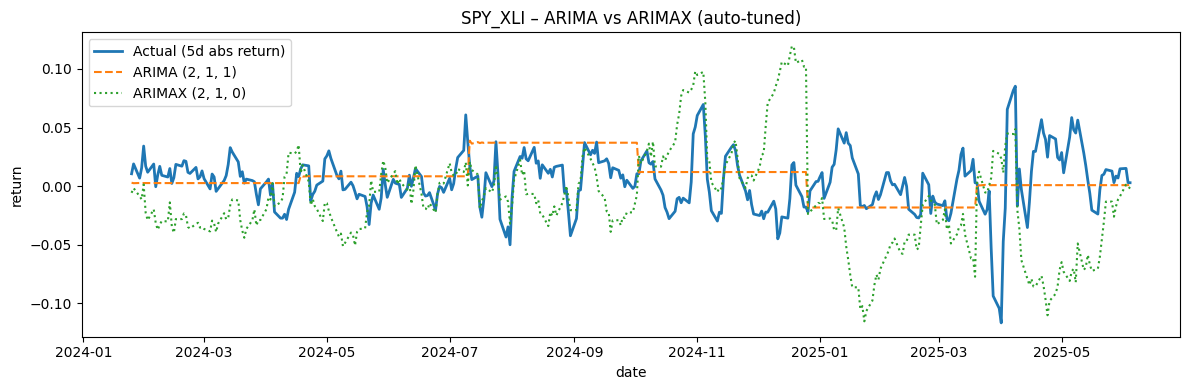

=== XLI 模型概览 ===
数据集键: SPY_XLI
ARIMA最优阶数: (2, 1, 1)  | 指标: {'MAE': 0.02176258142225838, 'RMSE': 0.028679991559350727, 'MAPE%': 358.10857311764806, 'Directional_Acc': 0.5802816901408451}
ARIMAX最优阶数: (2, 1, 0)  | 指标: {'MAE': 0.04015102874321228, 'RMSE': 0.05304417121432348, 'MAPE%': 681.3316384036391, 'Directional_Acc': 0.4422535211267606}
使用的外生变量（前几项）: ['XLI_volatility_21d', 'XLI_ATR', 'XLI_MFI_14d', 'XLI_Bollinger_%b_10d', 'XLI_momentum_1w', 'XLI_PriceBreakout', 'XLI_SPY_momentum_21d', 'XLI_MACD']
输出目录: forecast_outputs_one/SPY_XLI


In [ ]:
# 运行 XLI：自动筛特征 + 自动调参 + 分块滚动预测 + 出图/保存
info_xli = run_one_etf(
    etf="XLI",
    topk_base=18,   # 初筛候选数（相关性Top-K）
    topk_use=12,    # 最终用于ARIMAX的外生变量个数
    corr_thr=0.92,  # 共线性剔除阈值
    test_size=0.2,  # 最后20%作为测试集
    block=60        # 每60个交易日重拟合一次
)

# 查看关键信息
print("=== XLI 模型概览 ===")
print("数据集键:", info_xli["dataset_key"])
print("ARIMA最优阶数:", info_xli["best_order_arima"], " | 指标:", info_xli["metrics_arima"])
print("ARIMAX最优阶数:", info_xli["best_order_arimax"], " | 指标:", info_xli["metrics_arimax"])
print("使用的外生变量（前几项）:", info_xli["used_exog"][:8])
print("输出目录:", info_xli["outdir"])

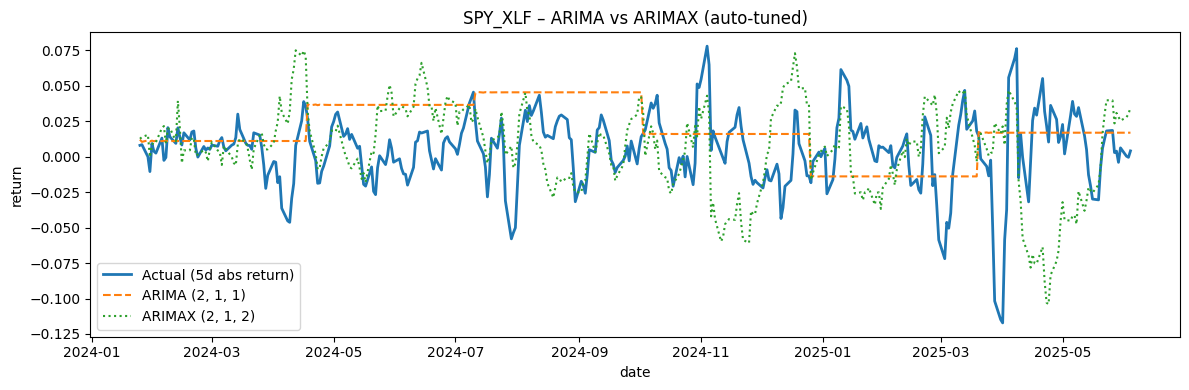

=== XLF 模型概览 ===
数据集键: SPY_XLF
ARIMA最优阶数: (2, 1, 1)  | 指标: {'MAE': 0.026741560080517868, 'RMSE': 0.034158187750749476, 'MAPE%': 7541.966731897467, 'Directional_Acc': 0.5859154929577465}
ARIMAX最优阶数: (2, 1, 2)  | 指标: {'MAE': 0.029452277850266214, 'RMSE': 0.03957343464249298, 'MAPE%': 5866.5892011357755, 'Directional_Acc': 0.543661971830986}
使用的外生变量（前几项）: ['XLF_volatility_21d', 'XLF_momentum_1m', 'XLF_MACD', 'XLF_rsi_14d', 'XLF_ATR', 'XLF_sharpe_10d', 'XLF_SPY_momentum_21d', 'XLF_MFI_14d']
输出目录: forecast_outputs_one/SPY_XLF


In [ ]:
# 运行 XLF：自动筛特征 + 自动调参 + 分块滚动预测 + 出图/保存
info_xlf = run_one_etf(
    etf="XLF",
    topk_base=18,   # 初筛候选数（相关性Top-K）
    topk_use=12,    # 最终用于ARIMAX的外生变量个数
    corr_thr=0.92,  # 共线性剔除阈值
    test_size=0.2,  # 最后20%作为测试集
    block=60        # 每60个交易日重拟合一次
)

# 查看关键信息
print("=== XLF 模型概览 ===")
print("数据集键:", info_xlf["dataset_key"])
print("ARIMA最优阶数:", info_xlf["best_order_arima"], " | 指标:", info_xlf["metrics_arima"])
print("ARIMAX最优阶数:", info_xlf["best_order_arimax"], " | 指标:", info_xlf["metrics_arimax"])
print("使用的外生变量（前几项）:", info_xlf["used_exog"][:8])
print("输出目录:", info_xlf["outdir"])

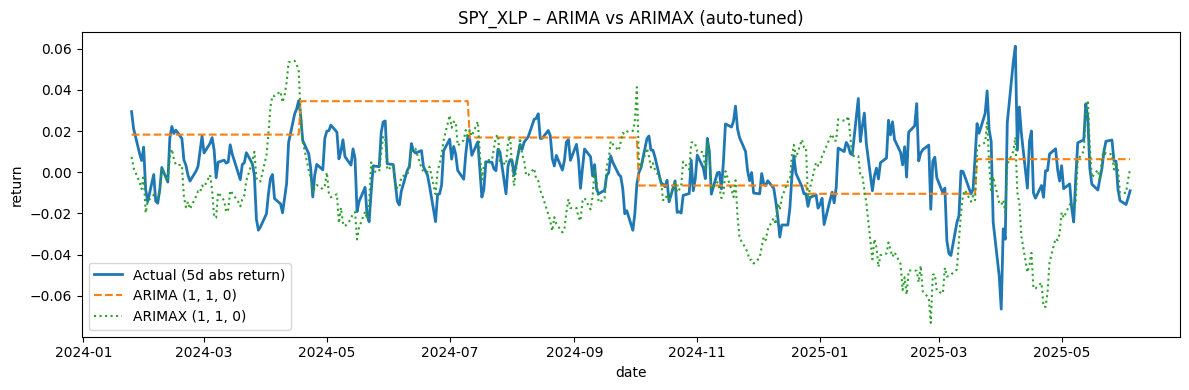

=== XLP 模型概览 ===
数据集键: SPY_XLP
ARIMA最优阶数: (1, 1, 0)  | 指标: {'MAE': 0.017796349649310005, 'RMSE': 0.022240837715904654, 'MAPE%': 2202.8959270581245, 'Directional_Acc': 0.6}
ARIMAX最优阶数: (1, 1, 0)  | 指标: {'MAE': 0.020561241919167732, 'RMSE': 0.026785915154126042, 'MAPE%': 2688.3608631725697, 'Directional_Acc': 0.5549295774647888}
使用的外生变量（前几项）: ['XLP_volatility_21d', 'XLP_momentum_1m', 'XLP_PriceBreakout', 'XLP_Bollinger_%b_10d', 'XLP_MACD', 'XLP_rsi_14d', 'XLP_sharpe_10d', 'XLP_momentum_1w']
输出目录: forecast_outputs_one/SPY_XLP


In [ ]:
# 运行 XLP：自动筛特征 + 自动调参 + 分块滚动预测 + 出图/保存
info_xlp = run_one_etf(
    etf="XLP",
    topk_base=18,   # 初筛候选数（相关性Top-K）
    topk_use=12,    # 最终用于ARIMAX的外生变量个数
    corr_thr=0.92,  # 共线性剔除阈值
    test_size=0.2,  # 最后20%作为测试集
    block=60        # 每60个交易日重拟合一次
)

# 查看关键信息
print("=== XLP 模型概览 ===")
print("数据集键:", info_xlp["dataset_key"])
print("ARIMA最优阶数:", info_xlp["best_order_arima"], " | 指标:", info_xlp["metrics_arima"])
print("ARIMAX最优阶数:", info_xlp["best_order_arimax"], " | 指标:", info_xlp["metrics_arimax"])
print("使用的外生变量（前几项）:", info_xlp["used_exog"][:8])
print("输出目录:", info_xlp["outdir"])

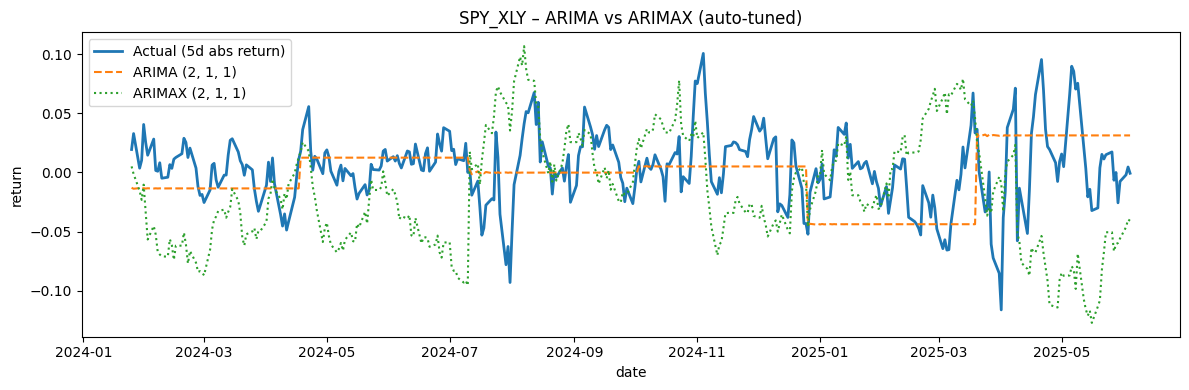

=== XLY 模型概览 ===
数据集键: SPY_XLY
ARIMA最优阶数: (2, 1, 1)  | 指标: {'MAE': 0.026673939324909617, 'RMSE': 0.03487478586856014, 'MAPE%': 3981.181315358919, 'Directional_Acc': 0.571830985915493}
ARIMAX最优阶数: (2, 1, 1)  | 指标: {'MAE': 0.04952471302740181, 'RMSE': 0.060785749452601796, 'MAPE%': 27847.50792882777, 'Directional_Acc': 0.4704225352112676}
使用的外生变量（前几项）: ['XLY_ATR', 'XLY_SPY_volume_ratio', 'XLY_KDJ_J', 'XLY_sharpe_10d', 'XLY_SPY_momentum_21d', 'XLY_MACD', 'XLY_PriceBreakout', 'XLY_volatility_21d']
输出目录: forecast_outputs_one/SPY_XLY


In [141]:
# 运行 XLY：自动筛特征 + 自动调参 + 分块滚动预测 + 出图/保存
info_xly = run_one_etf(
    etf="XLY",
    topk_base=18,   # 初筛候选数（Spearman Top-K）
    topk_use=12,    # 最终用于ARIMAX的外生变量个数
    corr_thr=0.92,  # 共线性剔除阈值
    test_size=0.2,  # 最后20%作为测试集
    block=60        # 每60个交易日重拟合一次
)

# 查看关键信息
print("=== XLY 模型概览 ===")
print("数据集键:", info_xly["dataset_key"])
print("ARIMA最优阶数:", info_xly["best_order_arima"], " | 指标:", info_xly["metrics_arima"])
print("ARIMAX最优阶数:", info_xly["best_order_arimax"], " | 指标:", info_xly["metrics_arimax"])
print("使用的外生变量（前几项）:", info_xly["used_exog"][:8])
print("输出目录:", info_xly["outdir"])

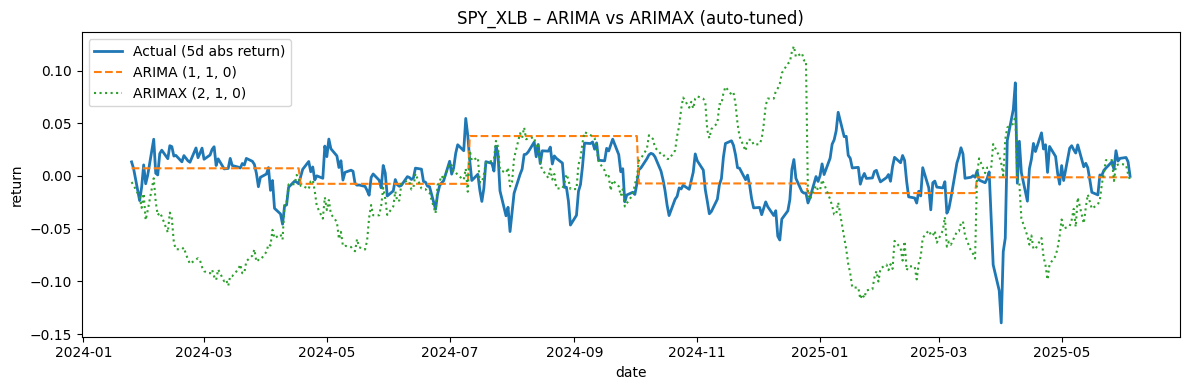

=== XLB 模型概览 ===
数据集键: SPY_XLB
ARIMA最优阶数: (1, 1, 0)  | 指标: {'MAE': 0.020685184854306395, 'RMSE': 0.028239963401402623, 'MAPE%': 257.81608400228413, 'Directional_Acc': 0.5633802816901409}
ARIMAX最优阶数: (2, 1, 0)  | 指标: {'MAE': 0.04937393889863785, 'RMSE': 0.06221095414774223, 'MAPE%': 859.2343140011382, 'Directional_Acc': 0.4704225352112676}
使用的外生变量（前几项）: ['XLB_volatility_21d', 'XLB_MFI_14d', 'XLB_MACD', 'XLB_momentum_1m', 'XLB_rsi_14d', 'XLB_ATR', 'XLB_momentum_1w', 'XLB_SPY_momentum_21d']
输出目录: forecast_outputs_one/SPY_XLB


In [ ]:
# 运行 XLB：自动筛特征 + 自动调参 + 分块滚动预测 + 出图/保存
info_xlb = run_one_etf(
    etf="XLB",
    topk_base=18,   # 初筛候选（Spearman Top-K）
    topk_use=12,    # 最终用于 ARIMAX 的外生变量个数
    corr_thr=0.92,  # 共线性阈值
    test_size=0.2,  # 最后 20% 作为测试集
    block=60        # 每 60 个交易日重拟合一次
)

print("=== XLB 模型概览 ===")
print("数据集键:", info_xlb["dataset_key"])
print("ARIMA最优阶数:", info_xlb["best_order_arima"], " | 指标:", info_xlb["metrics_arima"])
print("ARIMAX最优阶数:", info_xlb["best_order_arimax"], " | 指标:", info_xlb["metrics_arimax"])
print("使用的外生变量（前几项）:", info_xlb["used_exog"][:8])
print("输出目录:", info_xlb["outdir"])

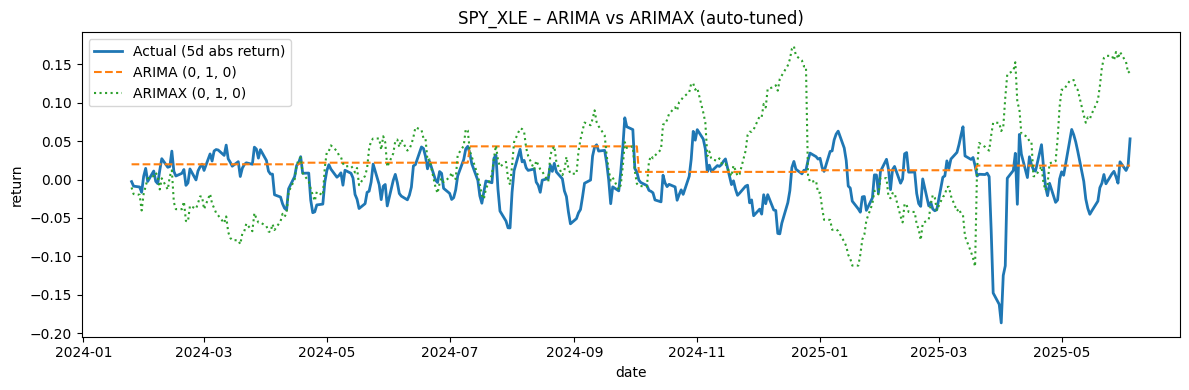

=== XLE 模型概览 ===
数据集键: SPY_XLE
ARIMA最优阶数: (0, 1, 0)  | 指标: {'MAE': 0.029266634504958634, 'RMSE': 0.0397235413303542, 'MAPE%': 320.7880821858582, 'Directional_Acc': 0.5521126760563381}
ARIMAX最优阶数: (0, 1, 0)  | 指标: {'MAE': 0.05713669468844234, 'RMSE': 0.07523774417834865, 'MAPE%': 574.2123414022797, 'Directional_Acc': 0.4788732394366197}
使用的外生变量（前几项）: ['XLE_volatility_21d', 'XLE_ATR', 'XLE_SPY_volume_ratio', 'XLE_MACD', 'XLE_SPY_momentum_21d', 'XLE_PriceBreakout', 'XLE_momentum_1w', 'XLE_sharpe_10d']
输出目录: forecast_outputs_one/SPY_XLE


In [ ]:
# 运行 XLE：自动筛特征 + 自动调参 + 分块滚动预测 + 出图/保存
info_xle = run_one_etf(
    etf="XLE",
    topk_base=18,   # 初筛候选（Spearman Top-K）
    topk_use=12,    # 最终用于 ARIMAX 的外生变量个数
    corr_thr=0.92,  # 共线性阈值
    test_size=0.2,  # 最后 20% 作为测试集
    block=60        # 每 60 个交易日重拟合一次
)

print("=== XLE 模型概览 ===")
print("数据集键:", info_xle["dataset_key"])
print("ARIMA最优阶数:", info_xle["best_order_arima"], " | 指标:", info_xle["metrics_arima"])
print("ARIMAX最优阶数:", info_xle["best_order_arimax"], " | 指标:", info_xle["metrics_arimax"])
print("使用的外生变量（前几项）:", info_xle["used_exog"][:8])
print("输出目录:", info_xle["outdir"])

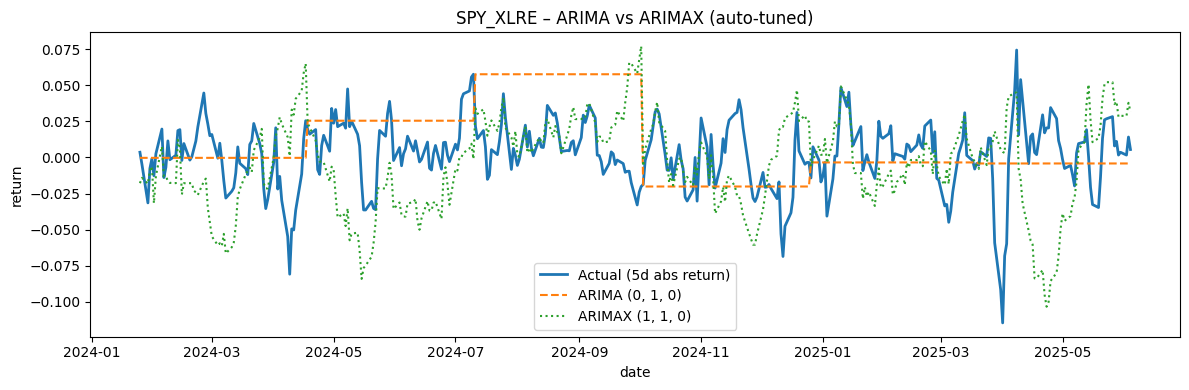

=== XLRE 模型概览 ===
数据集键: SPY_XLRE
ARIMA最优阶数: (0, 1, 0)  | 指标: {'MAE': 0.025118616682127365, 'RMSE': 0.032439077450772846, 'MAPE%': 6021.7076855533405, 'Directional_Acc': 0.5549295774647888}
ARIMAX最优阶数: (1, 1, 0)  | 指标: {'MAE': 0.02957695085543168, 'RMSE': 0.03916516142823617, 'MAPE%': 2070.2754201902676, 'Directional_Acc': 0.5492957746478874}
使用的外生变量（前几项）: ['XLRE_SPY_volume_ratio', 'XLRE_volatility_21d', 'XLRE_momentum_1m', 'XLRE_rsi_14d', 'XLRE_SPY_momentum_21d', 'XLRE_MACD', 'XLRE_ATR', 'XLRE_momentum_1w']
输出目录: forecast_outputs_one/SPY_XLRE


In [142]:
# 运行 XLRE：自动筛特征 + 自动调参 + 分块滚动预测 + 出图/保存
info_xlre = run_one_etf(
    etf="XLRE",
    topk_base=18,   # 初筛候选（Spearman Top-K）
    topk_use=12,    # 最终用于 ARIMAX 的外生变量个数
    corr_thr=0.92,  # 共线性阈值
    test_size=0.2,  # 最后 20% 作为测试集
    block=60        # 每 60 个交易日重拟合一次
)

print("=== XLRE 模型概览 ===")
print("数据集键:", info_xlre["dataset_key"])
print("ARIMA最优阶数:", info_xlre["best_order_arima"], " | 指标:", info_xlre["metrics_arima"])
print("ARIMAX最优阶数:", info_xlre["best_order_arimax"], " | 指标:", info_xlre["metrics_arimax"])
print("使用的外生变量（前几项）:", info_xlre["used_exog"][:8])
print("输出目录:", info_xlre["outdir"])

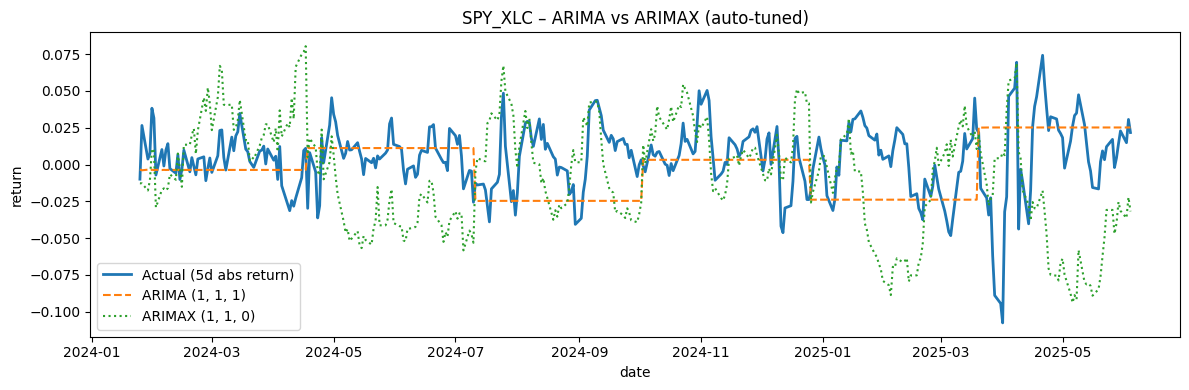

=== XLC 模型概览 ===
数据集键: SPY_XLC
ARIMA最优阶数: (1, 1, 1)  | 指标: {'MAE': 0.02139269272352751, 'RMSE': 0.028990412419930774, 'MAPE%': 1194.404099225151, 'Directional_Acc': 0.5549295774647888}
ARIMAX最优阶数: (1, 1, 0)  | 指标: {'MAE': 0.03641153708724452, 'RMSE': 0.04517231099143457, 'MAPE%': 4335.348819875387, 'Directional_Acc': 0.48732394366197185}
使用的外生变量（前几项）: ['XLC_momentum_1w', 'XLC_ATR', 'XLC_Bollinger_%b_10d', 'XLC_rsi_14d', 'XLC_momentum_1m', 'XLC_SPY_momentum_21d', 'XLC_sharpe_10d', 'XLC_PriceBreakout']
输出目录: forecast_outputs_one/SPY_XLC


In [ ]:
# 运行 XLC：自动筛特征 + 自动调参 + 分块滚动预测 + 出图/保存
info_xlc = run_one_etf(
    etf="XLC",
    topk_base=18,   # 初筛候选（Spearman Top-K）
    topk_use=12,    # 最终用于 ARIMAX 的外生变量个数
    corr_thr=0.92,  # 共线性阈值
    test_size=0.2,  # 最后 20% 作为测试集
    block=60        # 每 60 个交易日重拟合一次
)

print("=== XLC 模型概览 ===")
print("数据集键:", info_xlc["dataset_key"])
print("ARIMA最优阶数:", info_xlc["best_order_arima"], " | 指标:", info_xlc["metrics_arima"])
print("ARIMAX最优阶数:", info_xlc["best_order_arimax"], " | 指标:", info_xlc["metrics_arimax"])
print("使用的外生变量（前几项）:", info_xlc["used_exog"][:8])
print("输出目录:", info_xlc["outdir"])

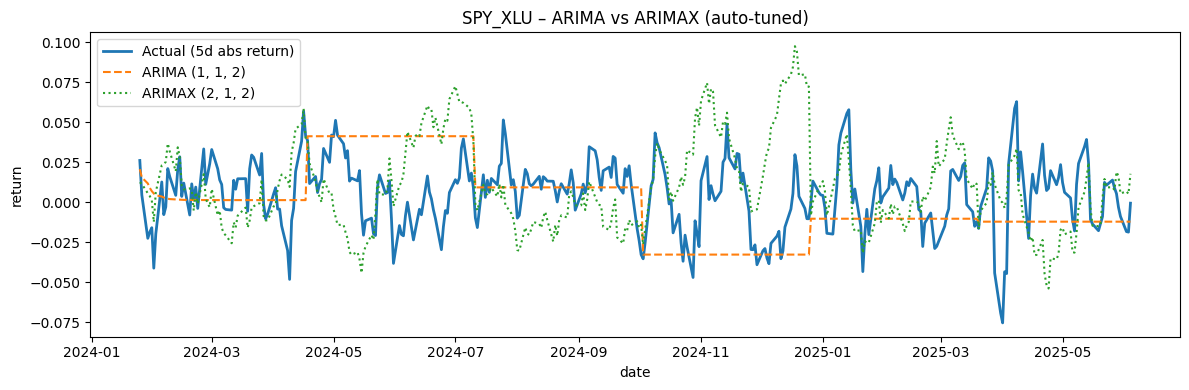

=== XLU 模型概览 ===
数据集键: SPY_XLU
ARIMA最优阶数: (1, 1, 2)  | 指标: {'MAE': 0.022724099909300025, 'RMSE': 0.02944774033091378, 'MAPE%': 11851.687141998398, 'Directional_Acc': 0.5774647887323944}
ARIMAX最优阶数: (2, 1, 2)  | 指标: {'MAE': 0.027154828736392963, 'RMSE': 0.03458208082153062, 'MAPE%': 12725.54145380984, 'Directional_Acc': 0.504225352112676}
使用的外生变量（前几项）: ['XLU_volatility_21d', 'XLU_MACD', 'XLU_Bollinger_%b_10d', 'XLU_sharpe_10d', 'XLU_momentum_1m', 'XLU_PriceBreakout', 'XLU_momentum_1w', 'XLU_ATR']
输出目录: forecast_outputs_one/SPY_XLU


In [ ]:
# 运行 XLU：自动筛特征 + 自动调参 + 分块滚动预测 + 出图/保存
info_xlu = run_one_etf(
    etf="XLU",
    topk_base=18,   # 初筛候选（Spearman Top-K）
    topk_use=12,    # 最终用于 ARIMAX 的外生变量个数
    corr_thr=0.92,  # 共线性阈值（更严格可设 0.90）
    test_size=0.2,  # 最后 20% 作为测试集
    block=60        # 每 60 个交易日重拟合一次（更快可设 90）
)

print("=== XLU 模型概览 ===")
print("数据集键:", info_xlu["dataset_key"])
print("ARIMA最优阶数:", info_xlu["best_order_arima"], " | 指标:", info_xlu["metrics_arima"])
print("ARIMAX最优阶数:", info_xlu["best_order_arimax"], " | 指标:", info_xlu["metrics_arimax"])
print("使用的外生变量（前几项）:", info_xlu["used_exog"][:8])
print("输出目录:", info_xlu["outdir"])

In [143]:
import pandas as pd
import numpy as np

# 假设你已经有 df_pred（列：date 索引，y_true, y_pred）
# 若还没设置日期索引：
# df_pred['date'] = pd.to_datetime(df_pred['date'])
# df_pred = df_pred.set_index('date').sort_index()

check = df_pred.copy()

# 1) 关键：两列是否同一时间索引
print("索引是否完全一致：", check['y_true'].index.equals(check['y_pred'].index))
print("样例：")
print(check[['y_true','y_pred']].head(10))

# 2) 交叉相关看是否0滞后最佳（若错位，通常会出现在±5天处更高）
def best_lag(y, x, max_lag=10):
    # 返回在 [-max_lag, max_lag] 范围内相关性最大的滞后（0 最佳对齐）
    lags = range(-max_lag, max_lag+1)
    corrs = []
    for k in lags:
        if k >= 0:
            c = np.corrcoef(y[k:], x[:-k] if k>0 else x)[0,1]
        else:
            c = np.corrcoef(y[:k], x[-k:])[0,1]
        corrs.append(c)
    best = lags[int(np.nanargmax(corrs))]
    return best, corrs

lag, corrs = best_lag(check['y_true'].values, check['y_pred'].values, max_lag=10)
print("最佳滞后（0 为完美对齐）：", lag)

# 3) 单日抽查（举例 2024-09-01）
sample_day = check.index.min()  # 你也可以换成 pd.Timestamp('2024-09-01')
print("\n抽查日期：", sample_day)
print("y_pred[t]（t 当天做出的预测）=", check.loc[sample_day,'y_pred'])
print("y_true[t]（t→t+5 的真实收益）   =", check.loc[sample_day,'y_true'])

索引是否完全一致： True
样例：
                                 y_true    y_pred
date                                             
1970-01-01 00:00:00.000000000  0.014509  0.014943
1970-01-01 00:00:00.000000001  0.000891  0.013916
1970-01-01 00:00:00.000000002 -0.022512  0.001105
1970-01-01 00:00:00.000000003 -0.017272 -0.004722
1970-01-01 00:00:00.000000004 -0.020044  0.024670
1970-01-01 00:00:00.000000005 -0.025743  0.021993
1970-01-01 00:00:00.000000006 -0.012681  0.030669
1970-01-01 00:00:00.000000007  0.004967  0.060683
1970-01-01 00:00:00.000000008  0.003115  0.041890
1970-01-01 00:00:00.000000009  0.018881  0.053663
最佳滞后（0 为完美对齐）： 0

抽查日期： 1970-01-01 00:00:00
y_pred[t]（t 当天做出的预测）= 0.0149428123828384
y_true[t]（t→t+5 的真实收益）   = 0.0145089497930008


In [ ]:
import os, glob, json, re
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==== 1) 基本配置 ====
ROOTS = [
    "./forecast_outputs_one",         # 我们刚封装的 run_one_etf() 的输出
    "./forecast_outputs_batch_fast",  # 之前快速批量的输出（如有）
    "./forecast_outputs"              # 你手动跑单模型时的输出（如有）
]
REPORT_DIR = Path("./reports")
SUMMARY_DIR = Path("./summary")
REPORT_DIR.mkdir(parents=True, exist_ok=True)
SUMMARY_DIR.mkdir(parents=True, exist_ok=True)

# 允许的命名（兼容你不同阶段的文件名）
ARIMA_PATTERNS  = ["*_ARIMA_tuned.csv", "*_ARIMA_preds.csv", "*_ARIMA_predictions.csv"]
ARIMAX_PATTERNS = ["*_ARIMAX_tuned.csv","*_ARIMAX_preds.csv","*_ARIMAX_predictions.csv"]

# ==== 2) 指标函数 ====
def eval_metrics(df, true_col="y_true", pred_col=None):
    df = df.dropna(subset=[true_col, pred_col]).copy()
    y = df[true_col]
    yhat = df[pred_col]
    mae  = float(np.mean(np.abs(y - yhat)))
    rmse = float(np.sqrt(np.mean((y - yhat)**2)))
    denom = np.abs(y).clip(lower=1e-6)
    mape = float(np.mean(np.abs((y - yhat)/denom))*100.0)
    da   = float((np.sign(yhat) == np.sign(y)).mean())
    return {"MAE":mae, "RMSE":rmse, "MAPE%":mape, "Directional_Acc":da}

def try_read(path):
    try:
        return pd.read_csv(path, parse_dates=True, index_col=0)
    except Exception:
        try:
            return pd.read_csv(path)
        except Exception:
            return None

def find_one(patterns, base):
    """在 base 下按多个 pattern 依次找文件，返回第一个命中的路径或 None"""
    for pat in patterns:
        hits = glob.glob(str(Path(base)/pat))
        if hits:
            # 优先取最新修改时间
            hits.sort(key=lambda p: os.path.getmtime(p), reverse=True)
            return hits[0]
    return None

def infer_etf_from_dir(dirname: str):
    # 目录多为 .../SPY_XLF/ 或 .../SPY_XLK/
    m = re.search(r"SPY_([A-Z]{2,4})$", dirname)
    return m.group(1) if m else None

def try_load_metadata(basedir: Path):
    """如果你以后把 run_one_etf 的信息写到 json，可在这里读取；现在可能没有，就返回 {}"""
    for cand in ["metadata.json","info.json","_info.json"]:
        p = basedir / cand
        if p.exists():
            try:
                return json.loads(p.read_text())
            except Exception:
                pass
    return {}

# ==== 3) 收集所有 ETF 子目录 ====
def scan_all_etf_dirs():
    etf_dirs = []
    for r in ROOTS:
        root = Path(r)
        if not root.exists(): 
            continue
        for d in root.rglob("SPY_*"):
            if d.is_dir():
                etf_dirs.append(d)
    # 去重
    uniq = {}
    for d in etf_dirs:
        uniq[str(d)] = d
    return list(uniq.values())

etf_dirs = scan_all_etf_dirs()
print(f"发现 {len(etf_dirs)} 个ETF结果目录")
if not etf_dirs:
    print("⚠️ 没找到任何结果目录。请确认 ROOTS 设置或先运行 run_one_etf() 生成结果。")

# ==== 4) 逐个 ETF 读取预测 & 计算指标 & 生成报告 ====
records = []
for d in sorted(etf_dirs, key=lambda p: str(p)):
    etf = infer_etf_from_dir(str(d)) or "UNKNOWN"
    arima_csv  = find_one(ARIMA_PATTERNS, d)
    arimax_csv = find_one(ARIMAX_PATTERNS, d)
    if not arima_csv and not arimax_csv:
        # 兼容你早期只有一个合成 CSV 的情形（带 y_true / y_pred 两列）
        # 尝试找 *_predictions.csv
        combo = find_one(["*predictions.csv","*_preds.csv"], d)
        if combo:
            dfc = try_read(combo)
            if dfc is not None and set(dfc.columns) >= {"y_true","y_pred"}:
                m = eval_metrics(dfc, true_col="y_true", pred_col="y_pred")
                records.append({"ETF": etf, "Model":"(generic)", **m, "Dir": str(d), "File": os.path.basename(combo)})
        continue

    # 读取 ARIMA
    if arima_csv:
        dfa = try_read(arima_csv)
        if dfa is not None:
            pred_col = [c for c in dfa.columns if "pred" in c.lower()]
            pred_col = pred_col[0] if pred_col else "y_pred_arima"
            if pred_col in dfa.columns and "y_true" in dfa.columns:
                m = eval_metrics(dfa, true_col="y_true", pred_col=pred_col)
                records.append({"ETF": etf, "Model":"ARIMA", **m, "Dir": str(d), "File": os.path.basename(arima_csv)})

    # 读取 ARIMAX
    if arimax_csv:
        dfx = try_read(arimax_csv)
        if dfx is not None:
            pred_col = [c for c in dfx.columns if "pred" in c.lower()]
            pred_col = pred_col[0] if pred_col else "y_pred_arimax"
            if pred_col in dfx.columns and "y_true" in dfx.columns:
                m = eval_metrics(dfx, true_col="y_true", pred_col=pred_col)
                records.append({"ETF": etf, "Model":"ARIMAX(raw)", **m, "Dir": str(d), "File": os.path.basename(arimax_csv)})

    # ===== 生成单个ETF的Markdown报告 =====
    if arima_csv or arimax_csv:
        meta = try_load_metadata(Path(d))
        # 自动查找对比图（优先 tuned 图）
        png = find_one(["*ARIMA_vs_ARIMAX_tuned.png","*Actual_vs_ARIMA_ARIMAX.png","*.png"], d)
        md  = []
        md.append(f"# SPY_{etf} – 模型报告\n")
        if meta:
            md.append("**元信息**\n")
            if "best_order_arima" in meta:
                md.append(f"- ARIMA best order: `{meta['best_order_arima']}`\n")
            if "best_order_arimax" in meta:
                md.append(f"- ARIMAX best order: `{meta['best_order_arimax']}`\n")
            if "used_exog" in meta:
                exogs = ", ".join(meta["used_exog"][:20])
                md.append(f"- 使用外生变量（TopK，展示前20）: {exogs}\n")
            md.append("\n")
        # 当前目录下对应指标（从 records 动态汇总）
        cur = [r for r in records if r["ETF"]==etf and r["Dir"]==str(d)]
        if cur:
            md.append("**评估指标**\n\n")
            md.append("| Model | MAE | RMSE | MAPE% | Directional_Acc |\n")
            md.append("|---|---:|---:|---:|---:|\n")
            for r in cur:
                md.append(f"| {r['Model']} | {r['MAE']:.6f} | {r['RMSE']:.6f} | {r['MAPE%']:.2f} | {r['Directional_Acc']:.4f} |\n")
            md.append("\n")
        # 插入图片（如果找到了）
        if png:
            rel = os.path.relpath(png, REPORT_DIR)
            md.append(f"![Actual vs Predicted]({rel})\n")
        report_path = REPORT_DIR / f"{etf}.md"
        report_path.write_text("".join(md), encoding="utf-8")

# ==== 5) 汇总与可视化 ====
if records:
    df_sum = pd.DataFrame(records)
    # 汇总表：一个ETF两行（ARIMA/ARIMAX）
    out_summary = SUMMARY_DIR / "etf_metrics_summary.csv"
    df_sum.sort_values(["ETF","Model"]).to_csv(out_summary, index=False)
    print("已写入：", out_summary)

    # 榜单：每个ETF选RMSE最小的模型
    best = (df_sum.sort_values("RMSE")
                .groupby("ETF", as_index=False).first()
                .sort_values("RMSE"))
    out_leader = SUMMARY_DIR / "leaderboard_by_rmse.csv"
    best.to_csv(out_leader, index=False)
    print("已写入：", out_leader)

    # 画全体 ETF 的 MAE / RMSE 对比（模型并排）
    plt.figure(figsize=(12,6))
    pivot_mae = df_sum.pivot(index="ETF", columns="Model", values="MAE")
    pivot_mae.plot(kind="bar", ax=plt.gca())
    plt.title("MAE by ETF and Model"); plt.ylabel("MAE"); plt.tight_layout()
    mae_png = SUMMARY_DIR / "overall_mae.png"
    plt.savefig(mae_png); plt.close()

    plt.figure(figsize=(12,6))
    pivot_rmse = df_sum.pivot(index="ETF", columns="Model", values="RMSE")
    pivot_rmse.plot(kind="bar", ax=plt.gca())
    plt.title("RMSE by ETF and Model"); plt.ylabel("RMSE"); plt.tight_layout()
    rmse_png = SUMMARY_DIR / "overall_rmse.png"
    plt.savefig(rmse_png); plt.close()

    # 合并一张（可选）
    plt.figure(figsize=(12,6))
    (pivot_mae.mean(axis=1).sort_values()).plot(kind="bar")
    plt.title("Average MAE (per ETF)"); plt.ylabel("MAE"); plt.tight_layout()
    avg_mae_png = SUMMARY_DIR / "overall_mae_avg.png"
    plt.savefig(avg_mae_png); plt.close()

    print("图像已写入：", mae_png, rmse_png, avg_mae_png)
else:
    print("⚠️ 未汇总到任何记录。请确认输出目录中存在 *_ARIMA_*.csv / *_ARIMAX_*.csv 或 *_predictions.csv。")

发现 9 个ETF结果目录
已写入： summary/etf_metrics_summary.csv
已写入： summary/leaderboard_by_rmse.csv
图像已写入： summary/overall_mae.png summary/overall_rmse.png summary/overall_mae_avg.png


In [144]:
import pandas as pd

# 假设你每个ETF的结果都存在一个字典里 results[etf]["ARIMA"], results[etf]["ARIMAX"]
# 每个里面是一个字典：{"MAE": ..., "RMSE": ..., "MAPE%": ..., "Directional_Acc": ...}

def collect_results(results_dict, etf_list):
    rows = []
    for etf in etf_list:
        for model in ["ARIMA", "ARIMAX"]:
            if model in results_dict[etf]:
                metrics = results_dict[etf][model]
                row = {
                    "ETF": etf,
                    "Model": model,
                    "MAE": metrics["MAE"],
                    "RMSE": metrics["RMSE"],
                    "MAPE%": metrics["MAPE%"],
                    "Directional_Acc": metrics["Directional_Acc"]
                }
                rows.append(row)
    df_summary = pd.DataFrame(rows)
    return df_summary

# 用法：
# summary_df = collect_results(results, ["XLU", "XLF", "XLP", "XLY", "XLB", "XLE", "XLK", "XLRE", "XLC", "XLI"])
# summary_df.to_csv("etf_model_summary.csv", index=False)
# print(summary_df)